<a href="https://colab.research.google.com/github/Thrcordeiro/DesafiosBootcamp/blob/main/Desafios_Bootcamp_Womakerscode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>**BootCamp TECH MINAs 2023**</font>



# <font color=green>Challenge Frequência e Medidas</font>
## <font color=blue>Desafio 1: Entendendo os estudantes.</font>

Esse desafio tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link:

https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais.

Variáveis:

● gender - gênero do aluno

● race/ethnicity - raça/etnia dos alunos

● parental level of education - grau de escolaridade dos pais

● lunch - tipo de almoço

● test preparation course - indica se fez curso preparatório

● math score - nota na prova de matematica

● reading score - nota na prova de leitura

● writing score - nota na prova de escrita

Os dados são arquivos em .csv.


Dica / Passo a Passo:

1. Leia a base de dados e faça uma análise inicial, como por exemplo, verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.

2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

3. Verifique a quantidade de alunos em cada grupo racial/étnico.

4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

5. Analise as notas de matemática dos alunos de forma mais completa possível.


Dica: Identifique o tipo de variável e faça todas análises que você sabe que pode ser aplicado para esse tipo de variável. Por exemplo, se for uma variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma variável qualitativa faça a tabela de fequência, moda, etc.

Faça também análises gráficas das sugestões abaixo ou o que achar pertinente.

● Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?

● Faça a mesma análise para as notas de leitura e escrita.

● Verifique gráficamente a relação da nota de leitura e de escrita.

Atividade extra:

Análise mais algum dado que seja interessante avaliar e represente graficamente, através de boxplot, histogramas, barplot dentre outros diversos de livre escolha.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

###1. Leia a base de dados e faça uma análise inicial, como por exemplo, verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.

In [2]:
dados = pd.read_csv('StudentsPerformance.csv')
dados

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
dados.shape

(1000, 8)

In [4]:
dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
dados.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Identificando as variaveis qualitativas e quantitativas:

In [6]:
dados.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

### 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

## <font color=green>Resposta:</font>

<font color=green>Não há necessidade de se alterar ou criar novas variáveis.</font>

### 3. Verifique a quantidade de alunos em cada grupo racial/étnico.

In [7]:
dados['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [8]:
dados.groupby(['race/ethnicity'])['race/ethnicity'].count()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

In [9]:
sorted(dados.groupby(['race/ethnicity'])['race/ethnicity'].count())

[89, 140, 190, 262, 319]

In [10]:
pd.crosstab(index = dados["race/ethnicity"], columns="count").sort_values('count', ascending = False)

col_0,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


<Axes: ylabel='race/ethnicity'>

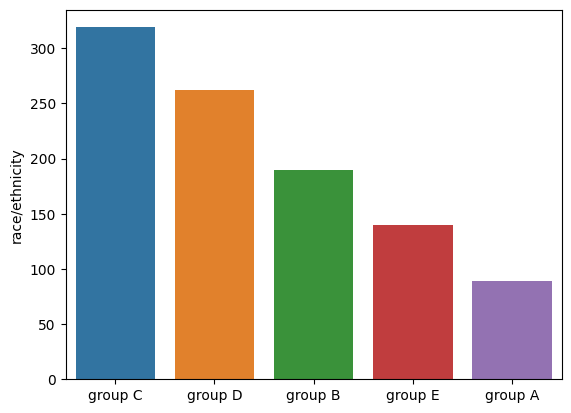

In [11]:
sns.barplot(x=dados['race/ethnicity'].value_counts().index, y=dados['race/ethnicity'].value_counts())

### 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [12]:
dados['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [13]:
dados['gender'].value_counts().max()

518

In [14]:
dados_1 = pd.crosstab(index = dados["gender"], columns="count").sort_values('count', ascending = False)
dados_1

col_0,count
gender,
female,518
male,482


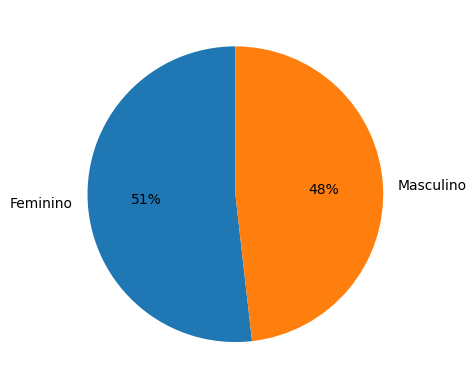

In [15]:
plt.pie([dados_1.loc['female'][0], dados_1.loc['male'][0]], labels = ["Feminino", "Masculino"], startangle=90, autopct='%i%%');

### 5. Analise as notas de matemática dos alunos de forma mais completa possível.

Dica: Identifique o tipo de variável e faça todas análises que você sabe que pode ser aplicado para esse tipo de variável. Por exemplo, se for uma variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma variável qualitativa faça a tabela de fequência, moda, etc.

Faça também análises gráficas das sugestões abaixo ou o que achar pertinente.


● Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?


● Faça a mesma análise para as notas de leitura e escrita.


● Verifique gráficamente a relação da nota de leitura e de escrita.

## Análises gráficas das sugestões abaixo ou o que achar pertinente.
### Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?

#### Notas de matématica

In [16]:
dados['math score'].median()

66.0

In [17]:
dados['math score'].mean()

66.089

In [18]:
dados['math score'].mode()

0    65
Name: math score, dtype: int64

In [19]:
dados['math score'].min()

0

In [20]:
dados['math score'].max()

100

<Axes: >

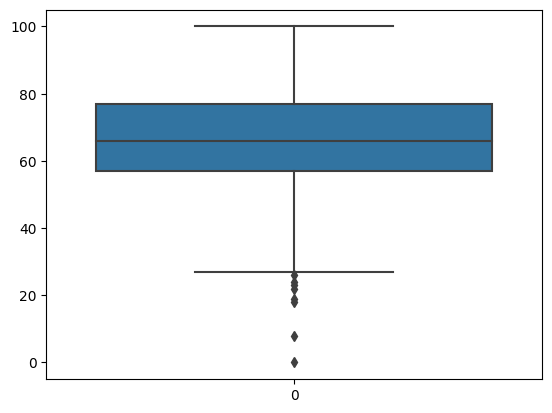

In [21]:
sns.boxplot(dados['math score'])

<Axes: title={'center': 'Notas Matemática'}, xlabel='math score'>

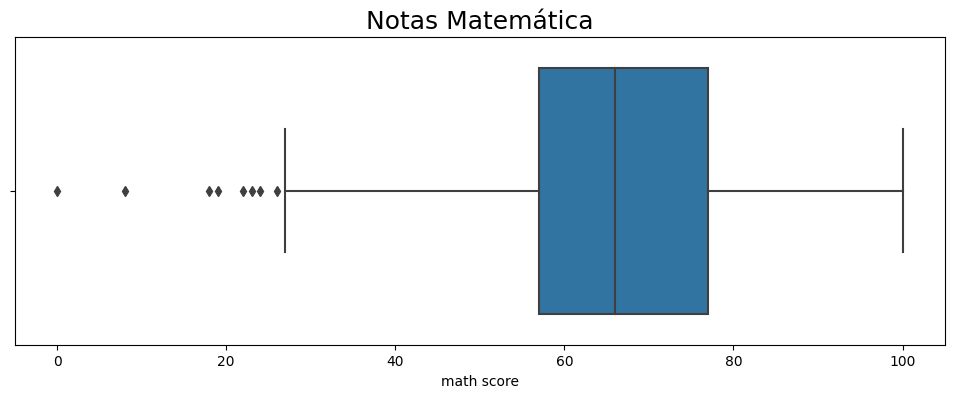

In [22]:
ax = sns.boxplot( x = 'math score', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Notas Matemática', fontsize=18)
ax

<ipython-input-23-43481518918c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['math score'])


<Axes: xlabel='math score', ylabel='Density'>

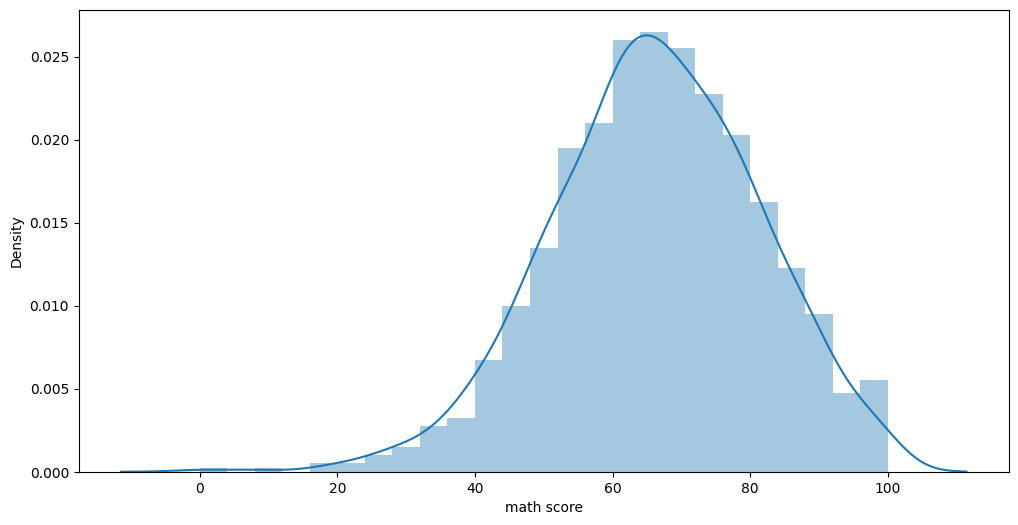

In [23]:
ax = sns.distplot(dados['math score'])
ax.figure.set_size_inches(12, 6)
ax

#### Segundo o grau de escolaridade dos pais:

In [24]:
dados_2 = dados.groupby('parental level of education')['math score'].mean().round(2)
dados_2

parental level of education
associate's degree    67.88
bachelor's degree     69.39
high school           62.14
master's degree       69.75
some college          67.13
some high school      63.50
Name: math score, dtype: float64

In [25]:
dados.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.88,70.93,69.90
bachelor's degree,69.39,73.00,73.38
high school,62.14,64.70,62.45
master's degree,69.75,75.37,75.68
some college,67.13,69.46,68.84
some high school,63.50,66.94,64.89


In [26]:
pivot_table = pd.pivot_table(dados, values='math score',  columns=['parental level of education'], aggfunc=np.sum)
pivot_table

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,15070,8188,12179,4115,15171,11366


In [27]:
pivot_table = pd.pivot_table(dados, values='math score',  columns=['parental level of education'], aggfunc=np.mean)
pivot_table

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

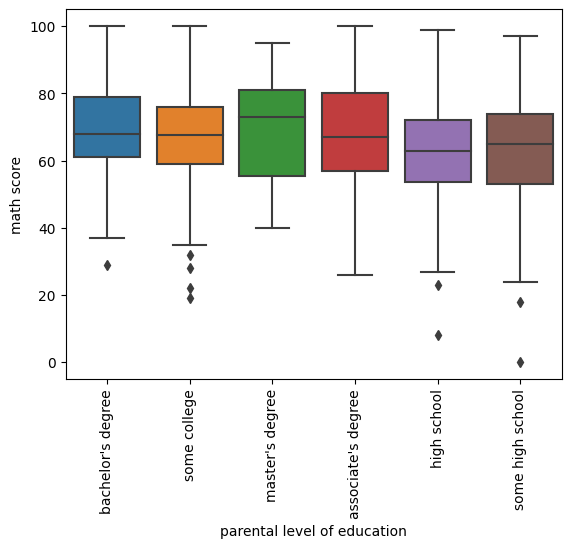

In [28]:
sns.boxplot(x='parental level of education', y = 'math score', data = dados)
plt.xticks(rotation = 90)

In [29]:
data_pivot = dados.pivot(columns = "parental level of education", values = "math score")
data_pivot

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,NaN,72.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,69.0,NaN
2,NaN,NaN,NaN,90.0,NaN,NaN
3,47.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,76.0,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,88.0,NaN,NaN
996,NaN,NaN,62.0,NaN,NaN,NaN
997,NaN,NaN,59.0,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,68.0,NaN


<Axes: ylabel='Density'>

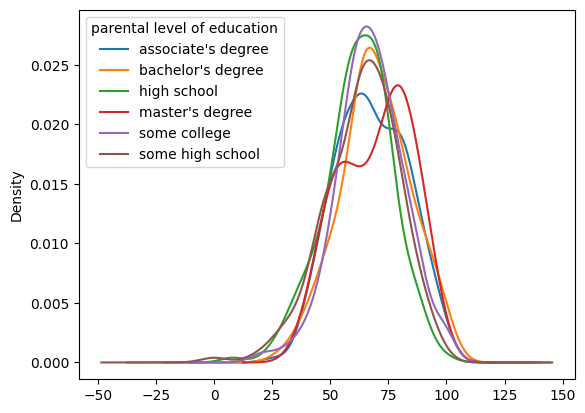

In [30]:
data_pivot.plot.density()

### Faça a mesma análise para as notas de leitura e escrita.

In [31]:
dados.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [32]:
dados['reading score'].median()

70.0

In [33]:
dados['reading score'].mode()

0    72
Name: reading score, dtype: int64

In [34]:
dados['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

In [35]:
dados['writing score'].median()

69.0

In [36]:
dados['writing score'].mode()

0    74
Name: writing score, dtype: int64

In [37]:
dados['writing score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64

### Verifique gráficamente a relação da nota de leitura e de escrita.

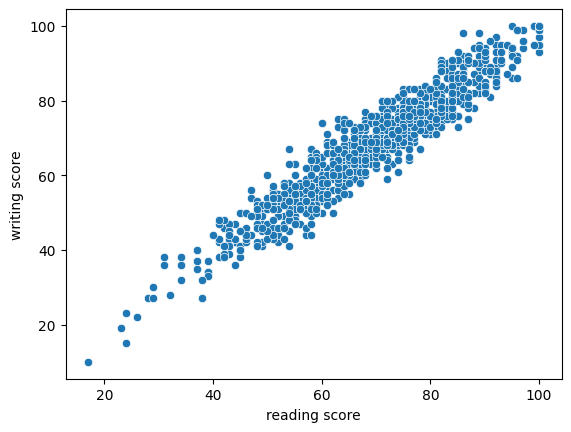

In [38]:
sns.scatterplot(data=dados, x="reading score", y="writing score")
plt.xlabel("reading score")
plt.ylabel("writing score")
plt.show()

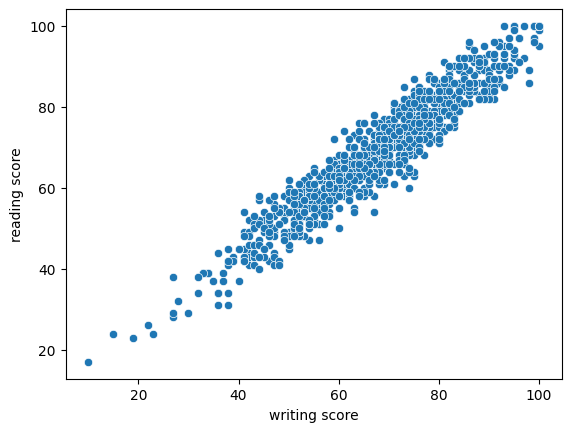

In [39]:
sns.scatterplot(data=dados, y="reading score", x="writing score")
plt.ylabel("reading score")
plt.xlabel("writing score")
plt.show()

In [40]:
covariance = np.cov(dados["reading score"], dados["writing score"])
covariance

array([[213.1656046 , 211.78666066],
       [211.78666066, 230.90799199]])

In [41]:
corr, _ = pearsonr(dados["reading score"], dados["writing score"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.955


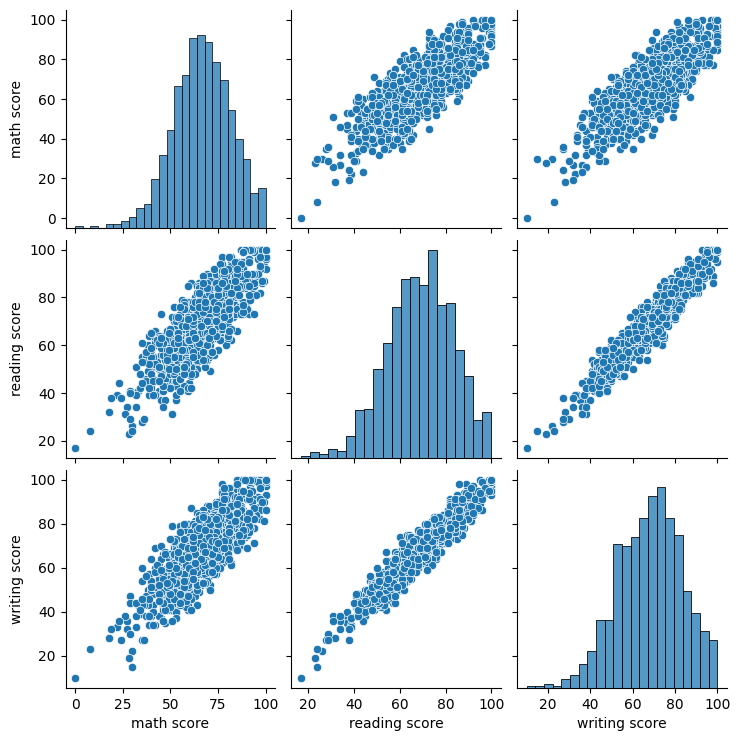

In [42]:
sns.pairplot(dados)

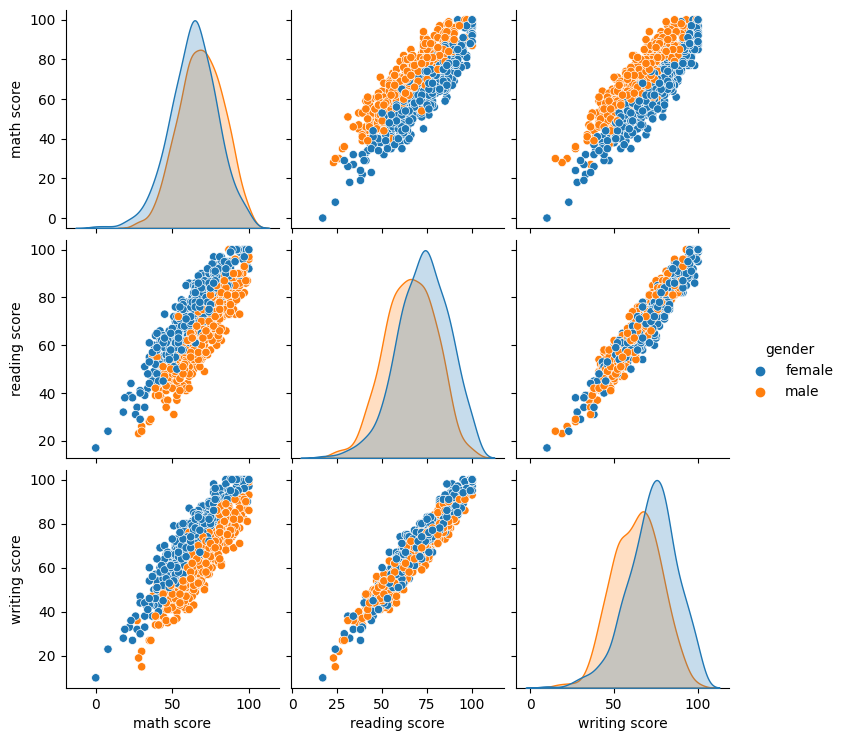

In [43]:
sns.pairplot(dados, hue="gender")

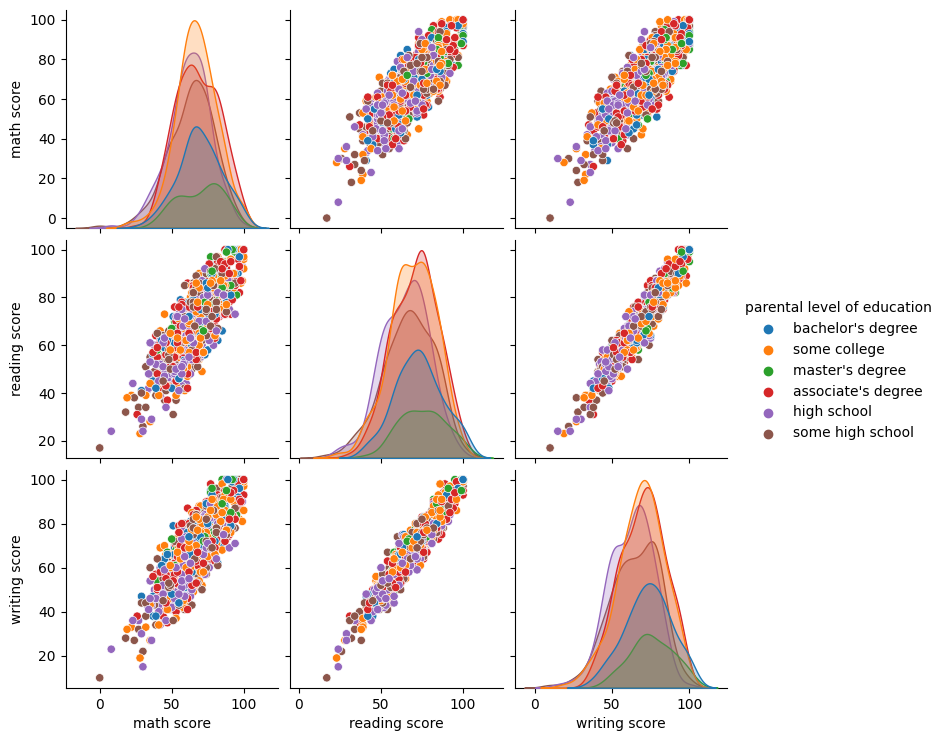

In [44]:
sns.pairplot(dados, hue="parental level of education")

## Atividade extra:

### Análise mais algum dado que seja interessante avaliar e represente graficamente, através de boxplot, histogramas, barplot dentre outros diversos de livre escolha

# <font color=green>Resposta:</font>

<font color=green>Não foi possivel escolher outra variavel para analisar graficamente, pois os dados não são númericos.</font>

---

# <font color=green>Challenge Probabilidade e Amostragem</font>

## <font color=blue>Desafio 1: Entendendo o Consumidor</font>

Suponha que você trabalha em uma empresa de produtos de beleza populares e, com a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing,pediu a sua ajuda e gostaria de entender se:
1. isso de fato aconteceu e
2. quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus anúncios.

Para isso, eles te enviaram a base de dados (desafio_01_consumidor.csv). Como você poderia ajudá-los?

#### Para responder esse desafio:

A base de dados: desafio_01_consumidor.csv contém informações de seus clientes (anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.

#### Dica / Passo a Passo:

1. Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

a. Identifique as distribuições

b. Plote histogramas / boxplots

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)

3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import norm
import math

In [46]:
consumidor = pd.read_csv("desafio01consumidor-230209-165113.csv")
consumidor

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


#### Primeiras análises do dataframe:

Usando o info() para imprimir as informações do dataframe (apesar desse comando já trazer muitas das informações que serão obtidas com os subsequentes métodos ou operações)

In [47]:
consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


Usando describe() para ter um resumo estatístico do dataframe

In [48]:
consumidor.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000


Usando columns para imprimir as colunas existentes

In [49]:
consumidor.columns

Index(['id_cliente', 'idade', 'renda', 'produto', 'regiao-BR', 'pre-pandemia'], dtype='object')

Usando dtypes para o tipo de dado de cada coluna

In [50]:
consumidor.dtypes

id_cliente      object
idade            int64
renda            int64
produto         object
regiao-BR       object
pre-pandemia     int64
dtype: object

Contabilizando o número de células vazias por coluna

In [51]:
consumidor.isna().sum()

id_cliente      0
idade           0
renda           0
produto         0
regiao-BR       0
pre-pandemia    0
dtype: int64

Usando shape para conhecer o tamanho do dataframe

In [52]:
consumidor.shape

(203, 6)

Usando unique() conhecer os valores únicos das colunas

In [53]:
consumidor['pre-pandemia'].unique()

array([1, 0])

In [54]:
consumidor['produto'].unique()

array(['batom', 'desodorante', 'sombra', 'perfume', 'antissinais', 'base'],
      dtype=object)

In [55]:
consumidor['regiao-BR'].unique()

array(['Sudeste', 'Nordeste', 'Centro-Oeste', 'Sul', 'Norte'],
      dtype=object)

Criando dois novos dataframes pré e pós pandemia

In [56]:
pre_pandemia = consumidor[consumidor['pre-pandemia'] == 1]
pre_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
96,XXXXXXX80,32,6251,antissinais,Norte,1
97,XXXXXXX92,43,2616,batom,Sul,1
98,XXXXXXX65,54,2324,antissinais,Norte,1
99,XXXXXXX79,61,12278,base,Centro-Oeste,1


In [57]:
pos_pandemia = consumidor[consumidor['pre-pandemia'] == 0]
pos_pandemia

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
101,XXXXXXX67,35,25959,batom,Sul,0
102,XXXXXXX60,35,1995,desodorante,Nordeste,0
103,XXXXXXX48,53,23314,antissinais,Centro-Oeste,0
104,XXXXXXX67,44,16693,antissinais,Centro-Oeste,0
105,XXXXXXX59,37,14631,base,Nordeste,0
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


## 1.Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

### a. Identifique as distribuições

### b. Plote histogramas / boxplots


#### Quantificando os registros pré e pós pandemia

In [58]:
frequencia = consumidor['pre-pandemia'].value_counts()
frequencia

0    102
1    101
Name: pre-pandemia, dtype: int64

normalizando o resultado

In [59]:
percentual = consumidor['pre-pandemia'].value_counts(normalize = True).round(4) * 100
percentual

0    50.25
1    49.75
Name: pre-pandemia, dtype: float64

In [60]:
dist_freq_qualitativa = pd.DataFrame({'frequencia': frequencia, 'porcentagem (%)': percentual})
dist_freq_qualitativa.rename(index = {0: 'pós pandemia', 1: 'pré pandemia'}, inplace = True)
dist_freq_qualitativa.rename_axis('Período', axis = 'columns', inplace  = True)
dist_freq_qualitativa

Período,frequencia,porcentagem (%)
pós pandemia,102,50.25
pré pandemia,101,49.75


<Axes: >

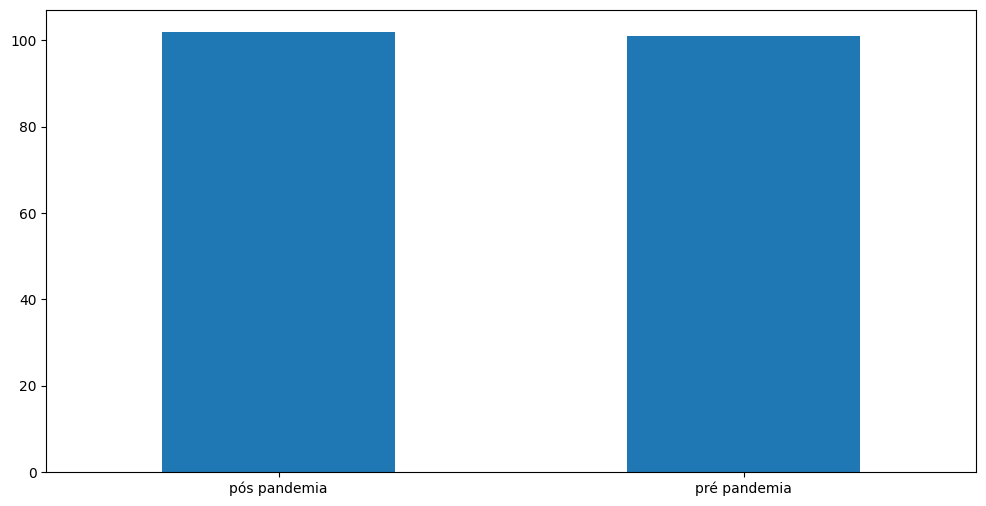

In [61]:
dist_freq_qualitativa['frequencia'].plot.bar(figsize = (12,6), rot=0)

<Axes: >

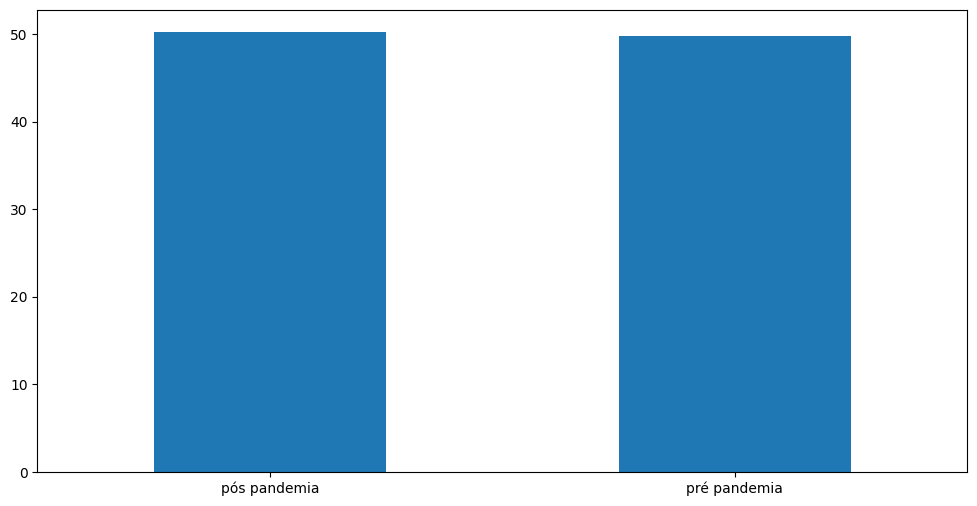

In [62]:
dist_freq_qualitativa['porcentagem (%)'].plot.bar(figsize = (12,6), rot=0)

#### Analisando a região

In [63]:
periodo = {
    0: 'pós pandemia',
    1: 'pré pandemia'
}

In [64]:
frequencia = pd.crosstab(consumidor['pre-pandemia'],
                         consumidor['regiao-BR'])
frequencia.rename(index = periodo, inplace = True)
frequencia.rename_axis('Período', axis = 'index', inplace  = True)
frequencia

regiao-BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Período,,,,,
pós pandemia,8,25,9,18,42
pré pandemia,17,26,8,21,29


<function matplotlib.pyplot.show(close=None, block=None)>

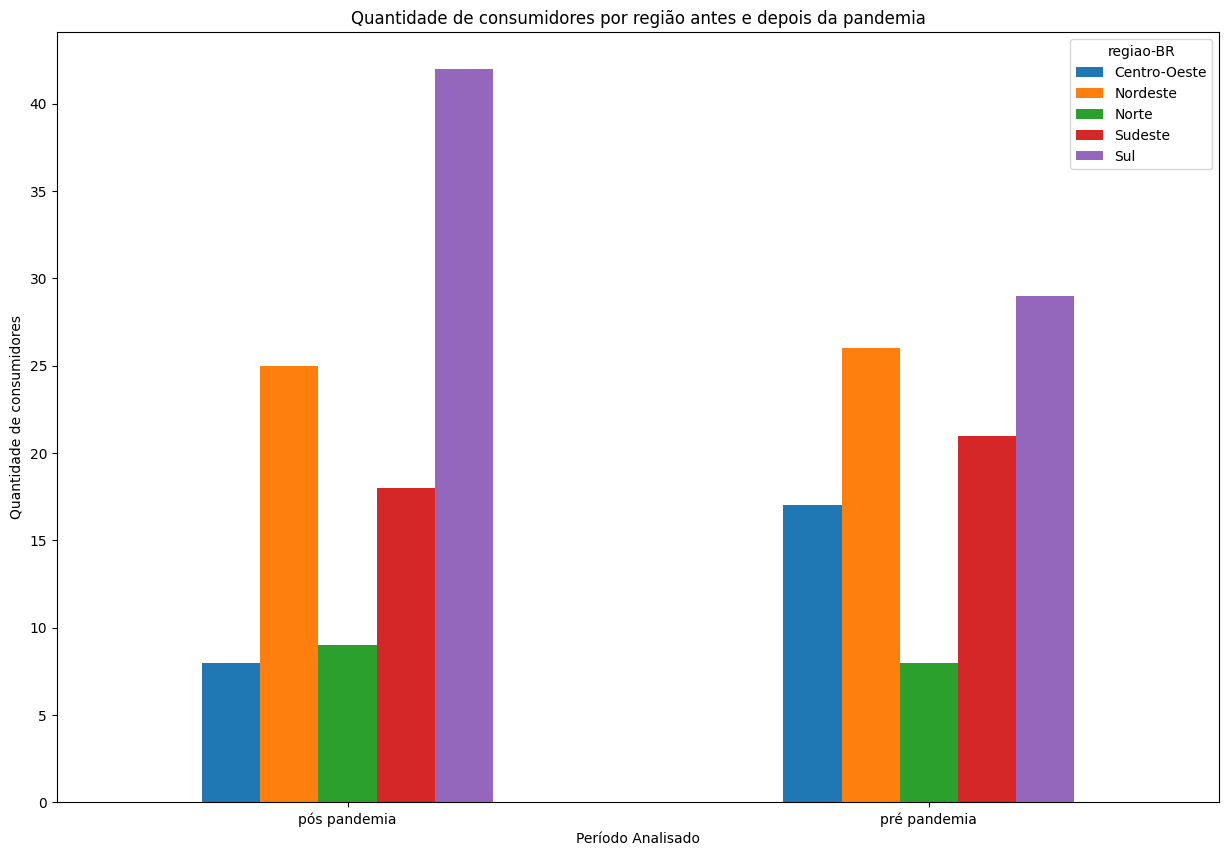

In [65]:
frequencia.plot.bar(figsize = (15,10), rot=0)
plt.xlabel("Período Analisado")
plt.ylabel("Quantidade de consumidores")
plt.title("Quantidade de consumidores por região antes e depois da pandemia")
plt.show

#### Analisando os produtos

In [66]:
frequencia_P = pd.crosstab(consumidor['pre-pandemia'],
                           consumidor['produto'])
frequencia_P.rename(index = periodo, inplace = True)
frequencia_P.rename_axis('Período', axis = 'index', inplace  = True)
frequencia_P

produto,antissinais,base,batom,desodorante,perfume,sombra
Período,,,,,,
pós pandemia,20,4,15,46,8,9
pré pandemia,9,3,61,20,4,4


<function matplotlib.pyplot.show(close=None, block=None)>

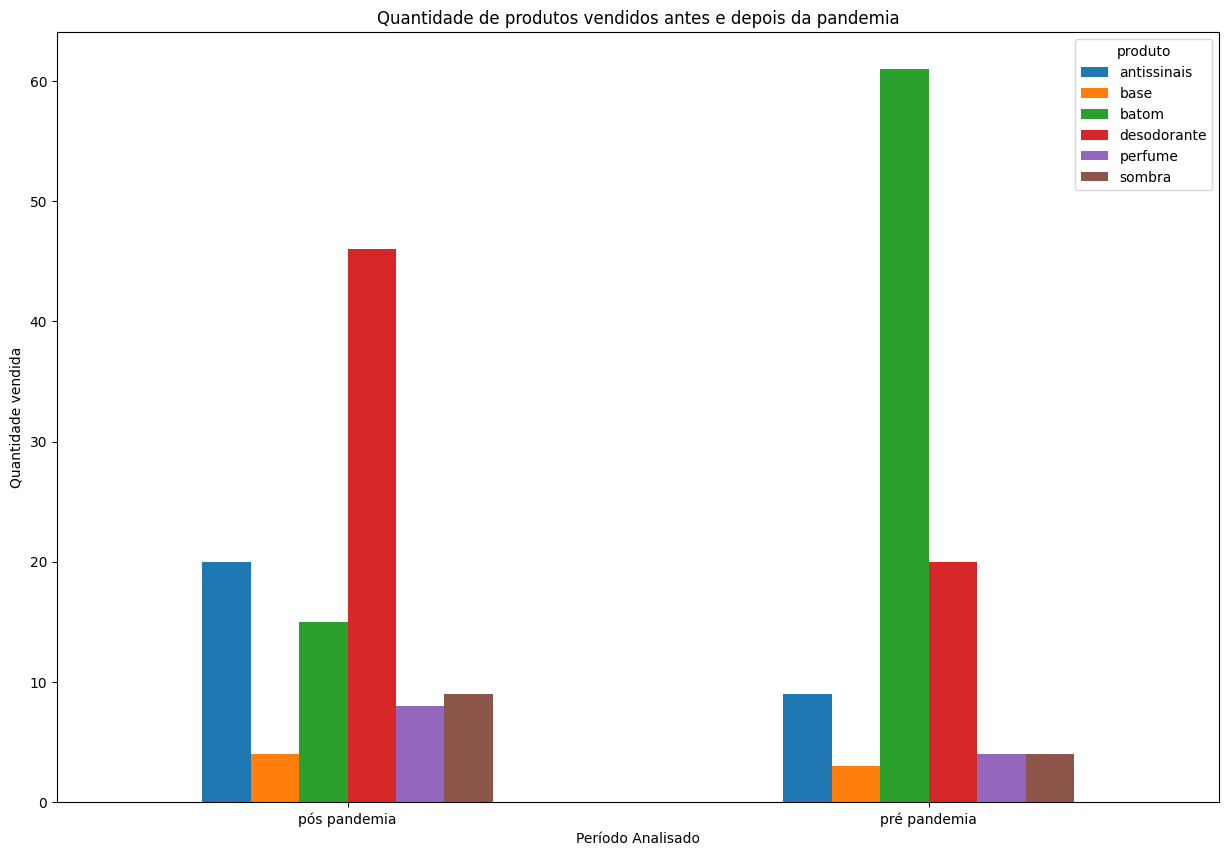

In [67]:
frequencia_P.plot.bar(figsize = (15,10), rot=0)
plt.xlabel("Período Analisado")
plt.ylabel("Quantidade vendida")
plt.title("Quantidade de produtos vendidos antes e depois da pandemia")
plt.show

#### Analisando as idades

Analisando o conjunto como um todo

In [68]:
mais_velho = consumidor['idade'].max()
mais_novo = consumidor['idade'].min()
media_idade = consumidor['idade'].mean()
mediana_idade = consumidor['idade'].median()
moda_idade = consumidor['idade'].mode()
desvio_padrao_idade = consumidor['idade'].std()

print("ANÁLISES DOS DADOS GERAIS:\n")
print(f'A idade da pessoa mais velha é {mais_velho} anos')
print(f'A idade da pessoa mais nova é {mais_novo} anos')
print(f'A média das idades de todas as pessoas é {media_idade:.2f} anos')
print(f'A mediana das idades de todas as pessoa é {mediana_idade} anos')
print(f'O desvio padrão das idades das pessoas é {desvio_padrao_idade:.2f} anos')
print("A Moda das idades %i" % moda_idade)

ANÁLISES DOS DADOS GERAIS:

A idade da pessoa mais velha é 80 anos
A idade da pessoa mais nova é 15 anos
A média das idades de todas as pessoas é 42.40 anos
A mediana das idades de todas as pessoa é 41.0 anos
O desvio padrão das idades das pessoas é 14.40 anos
A Moda das idades 37


Analisando pré-pandemia

In [69]:
mais_velho_p = pre_pandemia['idade'].max()
mais_novo_p = pre_pandemia['idade'].min()
media_idade_p = pre_pandemia['idade'].mean()
mediana_idade_p = pre_pandemia['idade'].median()
desvio_padrao_idade_p = pre_pandemia['idade'].std()

print("ANÁLISES DOS DADOS PRE PANDEMIA:\n")
print(f'A idade da pessoa mais velha é {mais_velho_p} anos')
print(f'A idade da pessoa mais nova é {mais_novo_p} anos')
print(f'A média das idades de todas as pessoas é {media_idade_p:.2f} anos')
print(f'A mediana das idades de todas as pessoa é {mediana_idade_p} anos')
print(f'O desvio padrão das idades das pessoas é {desvio_padrao_idade_p:.2f} anos')

ANÁLISES DOS DADOS PRE PANDEMIA:

A idade da pessoa mais velha é 80 anos
A idade da pessoa mais nova é 16 anos
A média das idades de todas as pessoas é 39.88 anos
A mediana das idades de todas as pessoa é 37.0 anos
O desvio padrão das idades das pessoas é 15.02 anos


Analisando pós-pandemia

In [70]:
mais_velho_pp = pos_pandemia['idade'].max()
mais_novo_pp = pos_pandemia['idade'].min()
media_idade_pp = pos_pandemia['idade'].mean()
mediana_idade_pp = pos_pandemia['idade'].median()
desvio_padrao_idade_pp = pos_pandemia['idade'].std()

print("ANÁLISES DOS DADOS PÓS PANDEMIA:\n")
print(f'A idade da pessoa mais velha é {mais_velho_pp} anos')
print(f'A idade da pessoa mais nova é {mais_novo_pp} anos')
print(f'A média das idades de todas as pessoas é {media_idade_pp:.2f} anos')
print(f'A mediana das idades de todas as pessoa é {mediana_idade_pp} anos')
print(f'O desvio padrão das idades das pessoas é {desvio_padrao_idade_pp:.2f} anos')

ANÁLISES DOS DADOS PÓS PANDEMIA:

A idade da pessoa mais velha é 77 anos
A idade da pessoa mais nova é 15 anos
A média das idades de todas as pessoas é 44.90 anos
A mediana das idades de todas as pessoa é 46.0 anos
O desvio padrão das idades das pessoas é 13.37 anos


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

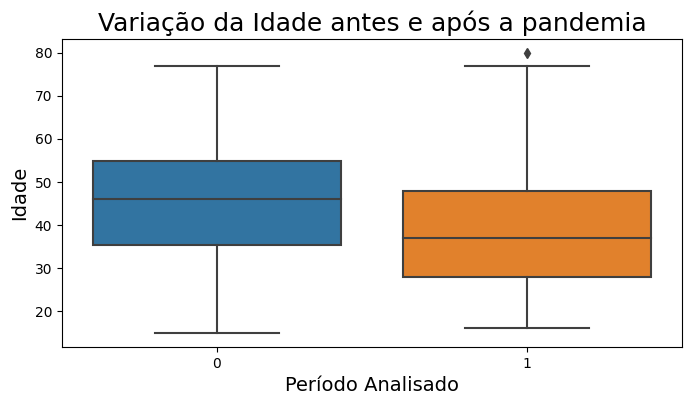

In [71]:
ax = sns.boxplot(x='pre-pandemia', y = 'idade', data = consumidor)
ax.set_title('Variação da Idade antes e após a pandemia', fontsize=18)
ax.set_xlabel('Período Analisado', fontsize=14)
ax.set_ylabel('Idade', fontsize=14)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0)

<ipython-input-72-3befb51c22bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(consumidor['idade'], bins=10)


<Axes: xlabel='idade', ylabel='Density'>

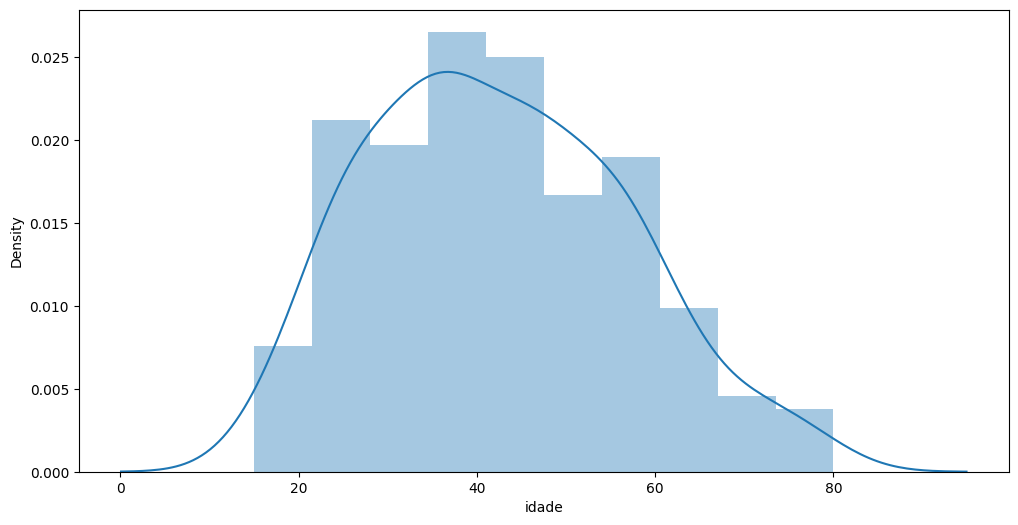

In [72]:
ax = sns.distplot(consumidor['idade'], bins=10)
ax.figure.set_size_inches(12,6)
ax

#### Analisando a renda

In [73]:
maior_renda= consumidor[consumidor['pre-pandemia'] == 1]['renda'].max()
maior_renda

24090

Analisando o conjunto como um todo

In [74]:
maior_renda = consumidor['renda'].max()
menor_renda = consumidor['renda'].min()
renda_media = consumidor['renda'].mean()
renda_mediana = consumidor['renda'].median()
desvio_padrao_renda = consumidor['renda'].std()

print("ANÁLISES DOS DADOS GERAIS:\n")
print(f'A maior renda é {maior_renda} reais')
print(f'A menor renda é {menor_renda} reais')
print(f'A renda média é {renda_media:.2f} reais')
print(f'A mediana das rendas é {renda_mediana} reais')
print(f'O desvio padrão das rendas é {desvio_padrao_renda:.2f} reais')

ANÁLISES DOS DADOS GERAIS:

A maior renda é 30000 reais
A menor renda é 110 reais
A renda média é 11586.36 reais
A mediana das rendas é 11145.0 reais
O desvio padrão das rendas é 6288.02 reais


Analisando os dados de renda pré pandemia

In [75]:
maior_renda_p = pre_pandemia['renda'].max()
menor_renda_p = pre_pandemia['renda'].min()
renda_media_p = pre_pandemia['renda'].mean()
renda_mediana_p = pre_pandemia['renda'].median()
desvio_padrao_renda_p = pre_pandemia['renda'].std()

print("ANÁLISES DOS DADOS PRE PANDEMIA:\n")
print(f'A maior renda é {maior_renda_p} reais')
print(f'A menor renda é {menor_renda_p} reais')
print(f'A renda média é  {renda_media_p:.2f} reais')
print(f'A mediana das rendas é {renda_mediana_p} reais')
print(f'O desvio padrão das rendas é {desvio_padrao_renda_p:.2f} reais')

ANÁLISES DOS DADOS PRE PANDEMIA:

A maior renda é 24090 reais
A menor renda é 110 reais
A renda média é  9180.64 reais
A mediana das rendas é 7488.0 reais
O desvio padrão das rendas é 6007.68 reais


Analisando os dados de renda pós pandemia

In [76]:
maior_renda_pp = pos_pandemia['renda'].max()
menor_renda_pp = pos_pandemia['renda'].min()
renda_media_pp = pos_pandemia['renda'].mean()
renda_mediana_pp = pos_pandemia['renda'].median()
desvio_padrao_renda_pp = pos_pandemia['renda'].std()

print("ANÁLISES DOS DADOS POS PANDEMIA:\n")
print(f'A maior renda é {maior_renda_pp} reais')
print(f'A menor renda é {menor_renda_pp} reais')
print(f'A renda média é  {renda_media_pp:.2f} reais')
print(f'A mediana das rendas é {renda_mediana_pp} reais')
print(f'O desvio padrão das rendas é {desvio_padrao_renda_pp:.2f} reais')

ANÁLISES DOS DADOS POS PANDEMIA:

A maior renda é 30000 reais
A menor renda é 1995 reais
A renda média é  13968.50 reais
A mediana das rendas é 13380.5 reais
O desvio padrão das rendas é 5641.38 reais


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

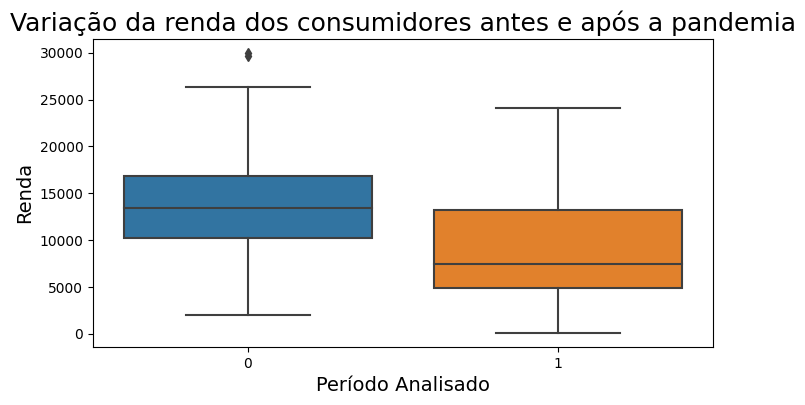

In [77]:
ax = sns.boxplot(x='pre-pandemia', y = 'renda', data = consumidor)
ax.set_title('Variação da renda dos consumidores antes e após a pandemia', fontsize=18)
ax.set_xlabel('Período Analisado', fontsize=14)
ax.set_ylabel('Renda', fontsize=14)
ax.figure.set_size_inches(8, 4)
plt.xticks(rotation = 0)

<ipython-input-78-38fa74e7eb5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(consumidor['renda'], bins=10)


<Axes: xlabel='renda', ylabel='Density'>

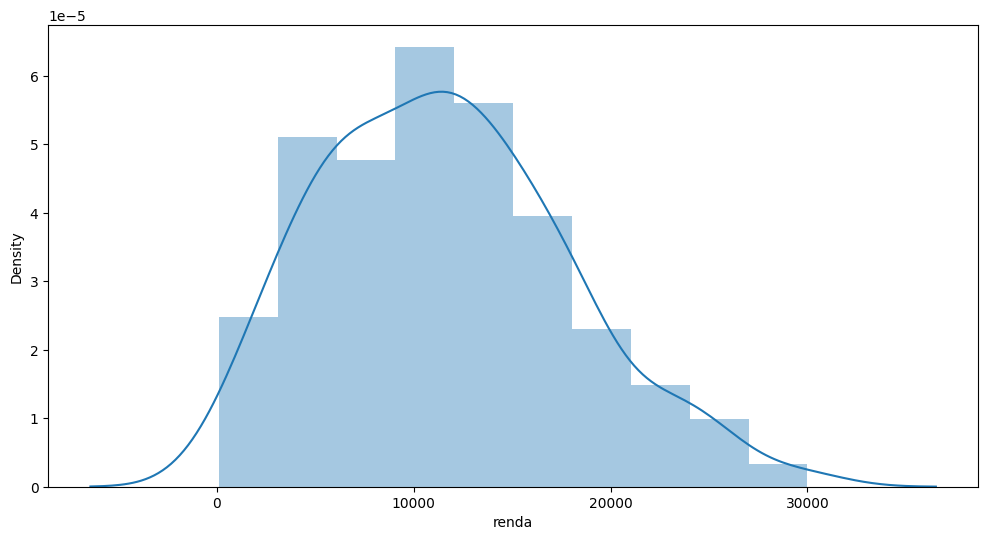

In [78]:
ax = sns.distplot(consumidor['renda'], bins=10)
ax.figure.set_size_inches(12,6)
ax

# 2 - Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ?

### <font color=green>Resposta:</font>

<font color=green>Em termos de quantidade, não houve alteração significativa na quantidade vendida antes e depois da pandemia.
Região:
Antes da pandemia, não tinha nenhuma região com um consumo mais acentuado comparada às demais, porém após a pandemia, a região Sul passou a ter um papel muito mais acentuado comparado as demais
Produtos:
Antes da pandemia, o produto mais vendido era o batom, e após a pandemia passou a ser o desodorante, seguido dos antissinais e pelo batom
Renda: a renda média dos consumidores pós pandemia aumentou, e a dispersão foi menor
Idade: a idade média pós pandemia aumentou em comparação a média pré pandemia</font>

<ipython-input-79-5493719bf69c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pre_pandemia['renda'])


<Axes: xlabel='renda', ylabel='Density'>

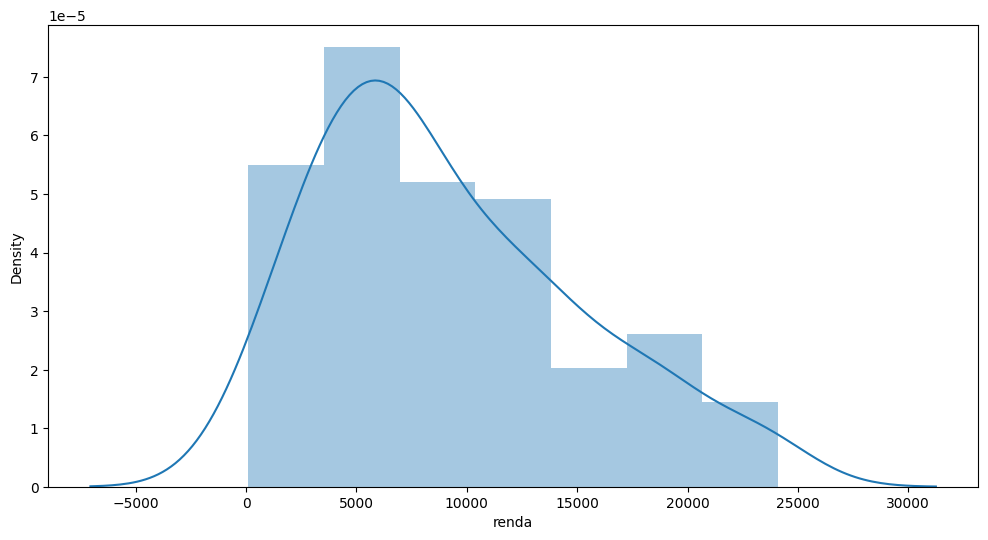

In [79]:
ax = sns.distplot(pre_pandemia['renda'])
ax.figure.set_size_inches(12,6)
ax

<ipython-input-80-42be59b7b739>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pos_pandemia['renda'])


<Axes: xlabel='renda', ylabel='Density'>

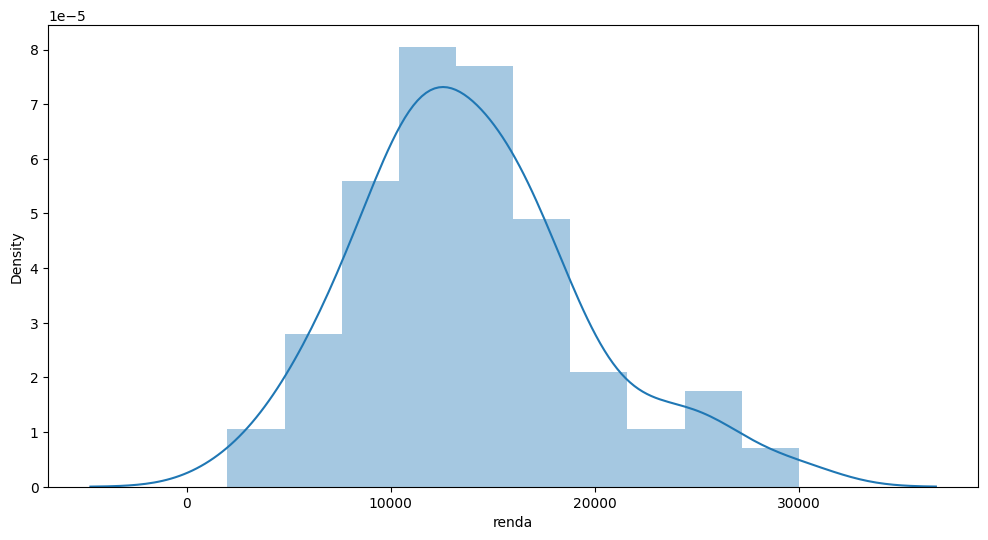

In [80]:
ax = sns.distplot(pos_pandemia['renda'])
ax.figure.set_size_inches(12,6)
ax

## 3 - Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

Observações:

O desvio padrão ( σ ou s ) e o erro ( e ) devem estar na mesma unidade de medida.

Quando o erro ( e ) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

In [81]:
N = 100000
N

100000

Para 95% de confiança

In [82]:
z = norm.ppf(0.975)
z

1.959963984540054

Analisando apenas a parte da renda, tem-se

In [83]:
media_renda = round(pre_pandemia['renda'].mean(), 2)
std_renda = round(pre_pandemia['renda'].std(), 2)
print(f"Média pré pandemia {media_renda}, desvio padrão pré pandemia {std_renda}")

Média pré pandemia 9180.64, desvio padrão pré pandemia 6007.68


Analisando apenas a parte da idade, tem-se

In [84]:
media_idade = round(pre_pandemia['idade'].mean(), 2)
std_idade = round(pre_pandemia['idade'].std(), 2)
print(f"Média pré pandemia {media_idade}, desvio padrão pré pandemia {std_idade}")

Média pré pandemia 39.88, desvio padrão pré pandemia 15.02


In [85]:
s_renda = std_renda
s_renda

6007.68

Erro, percentual da média, 2% da média da renda

In [86]:
e2 = 0.02 * media_renda
e2

183.6128

Erro, percentual da média, 10% da média da renda

In [87]:
e10 = 0.1 * media_renda
e10

918.064

In [88]:
s_idade = std_idade
s_idade

15.02

Erro, percentual da média, 2% da média da idade

In [89]:
e2_id = 0.02 * media_idade
e2_id

0.7976000000000001

Erro, percentual da média, 10% da média da idade

In [90]:
e10_id = 0.1 * media_idade
e10_id

3.9880000000000004

In [91]:
def tamanho_amostra(N, z, s, e):
  n = ((z**2) * (s**2) * N) / (((z**2) * (s**2))  + ((e**2) * (N - 1) ))
  n_int = int(n.round())
  return n_int

In [92]:
amostra_2_erro = tamanho_amostra(N, z, s_renda, e2)
print(f"Para 2% de margem de erro, o tamanho da amostra deve ser de {amostra_2_erro}")

Para 2% de margem de erro, o tamanho da amostra deve ser de 3950


In [93]:
amostra_10_erro = tamanho_amostra(N, z, s_renda, e10)
print(f"Para 10% de margem de erro, o tamanho da amostra deve ser de {amostra_10_erro}")

Para 10% de margem de erro, o tamanho da amostra deve ser de 164


In [94]:
amostra_2_erro_id = tamanho_amostra(N, z, s_idade, e2_id)
print(f"Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de {amostra_2_erro_id}")

Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de 1344


In [95]:
amostra_10_erro_id = tamanho_amostra(N, z, s_idade, e10_id)
print(f"Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de {amostra_10_erro_id}")

Para 10% de margem de erro, baseado na idade, o tamanho da amostra deve ser de 54


Considerando a fórmula para o cálculo do tamanho da amostra:

In [96]:
def tamanho_amostra(N, E):
  n0 = np.array([((N * (1/(e**2))) / (N + ( 1/(e**2) ))) for e in E])
  return n0

In [97]:
N = 100000
N

100000

In [98]:
lista_e = np.array([x for x in range(1, 101, 1)]) / 100
lista_e

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [99]:
lista_n = tamanho_amostra(N, lista_e)
lista_n = lista_n.astype(int)
lista_n

array([9090, 2439, 1098,  621,  398,  277,  203,  156,  123,   99,   82,
         69,   59,   50,   44,   39,   34,   30,   27,   24,   22,   20,
         18,   17,   15,   14,   13,   12,   11,   11,   10,    9,    9,
          8,    8,    7,    7,    6,    6,    6,    5,    5,    5,    5,
          4,    4,    4,    4,    4,    3,    3,    3,    3,    3,    3,
          3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          0])

In [100]:
tam_amostra = {'Erro': lista_e, 'Tamanho': lista_n}
tam_amostra_df = pd.DataFrame(data=tam_amostra)
tam_amostra_df

,Erro,Tamanho
0,0.01,9090
1,0.02,2439
2,0.03,1098
3,0.04,621
4,0.05,398
...,...,...
95,0.96,1
96,0.97,1
97,0.98,1
98,0.99,1


<Axes: xlabel='Erro', ylabel='Tamanho'>

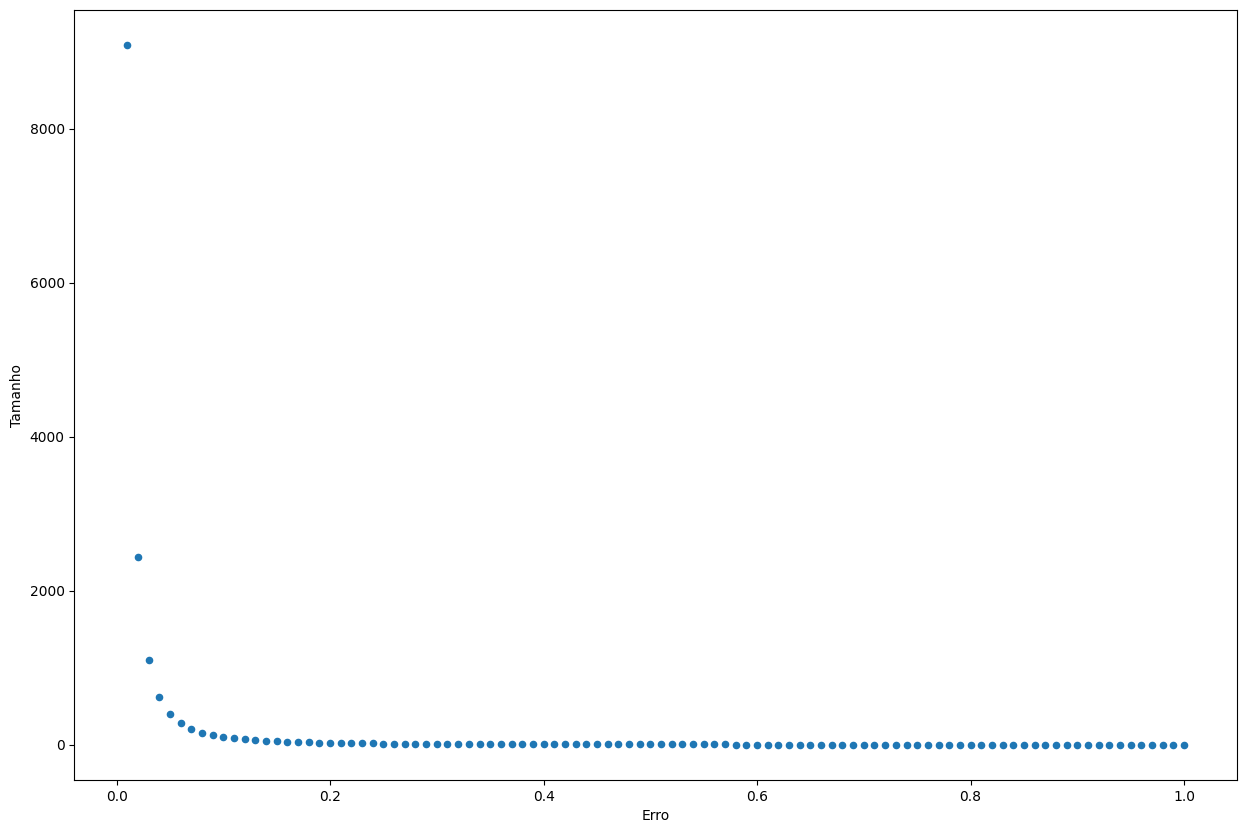

In [101]:
from IPython.core.pylabtools import figsize
tam_amostra_df.plot(x = 'Erro', y = 'Tamanho', kind = 'scatter', figsize=(15,10))

---

# <font color=green>Challenge  Probabilidade e Amostragem</font>

## <font color=blue>Desafio 2:  Determinando o Estoque de Segurança.</font>

Suponha agora que você trabalha em uma empresa de produtos perecíveis, como Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque seja eficiente. É necessário manter um estoque de segurança em todos os produtos (acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem não ser comprados, e consequentemente, jogados fora, o que na indústria se chama "desova". Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de análise de dados, e ele gostaria de saber qual o estoque de segurança ideal.

1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição
normal? Que características você identificou para chegar a essa conclusão?

2. Assuma que:
a. Os dados seguem uma distribuição normal.
b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%
c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.


In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy.stats import normaltest

In [103]:
estoque_df = pd.read_csv('desafio_02_estoque.csv')
estoque_df.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


#### Explorando os dados do DataFrame:

In [104]:
estoque_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            370 non-null    object
 1   vendas-iogurte  370 non-null    int64 
 2   lead-time       370 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [105]:
estoque_df.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


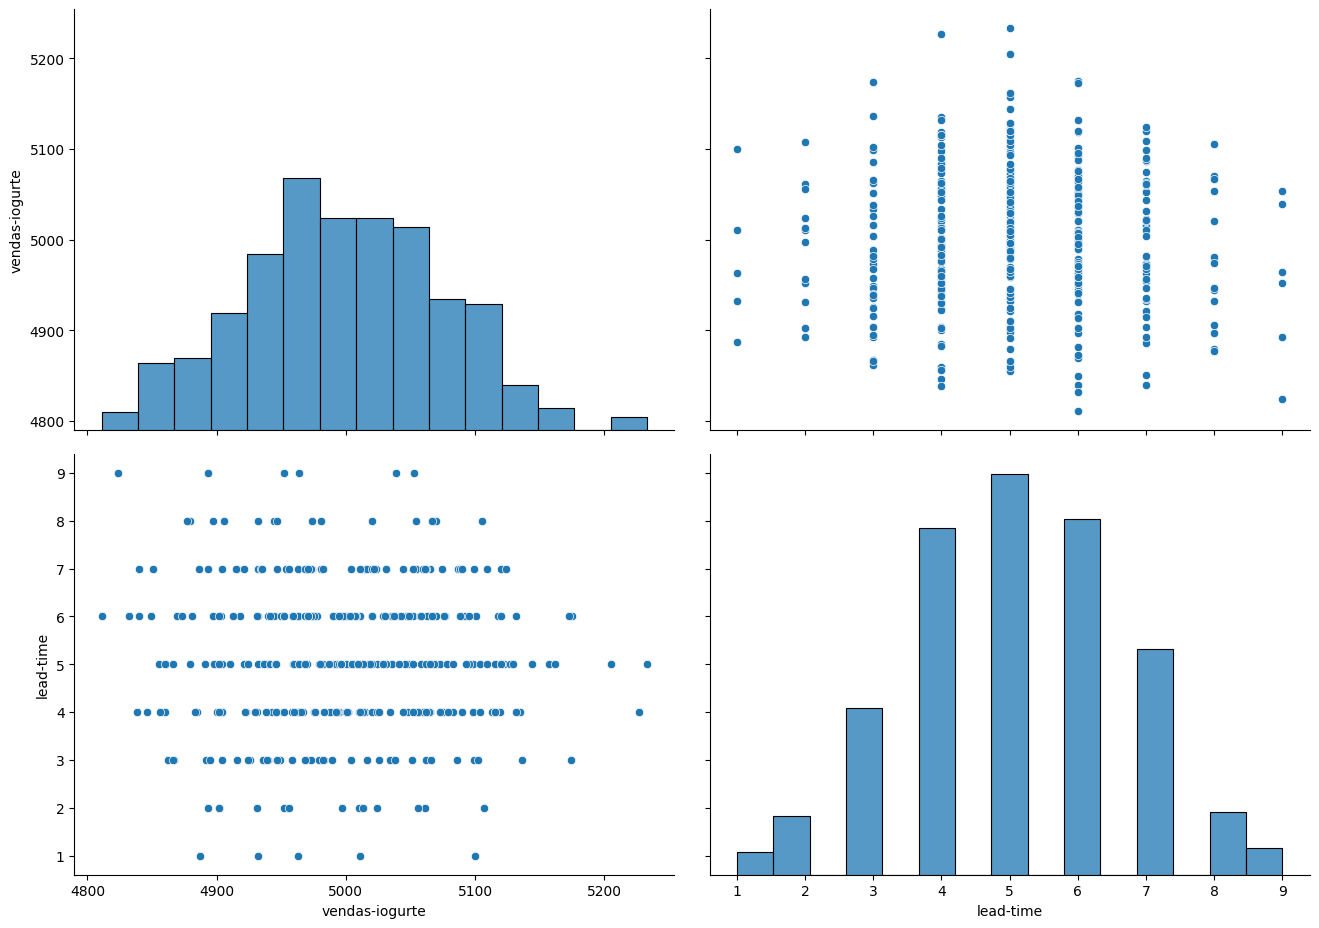

In [106]:
ax = sns.pairplot(estoque_df)
ax.figure.set_size_inches(15,10)
ax

## 1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?

In [107]:
estoque_df['vendas-iogurte'].mean().round(2)  ##cálculo da média

4999.17

In [108]:
estoque_df['vendas-iogurte'].median()  ##cálculo da mediana

4996.0

In [109]:
estoque_df['vendas-iogurte'].mode()   ##cálculo da moda

0    5020
Name: vendas-iogurte, dtype: int64

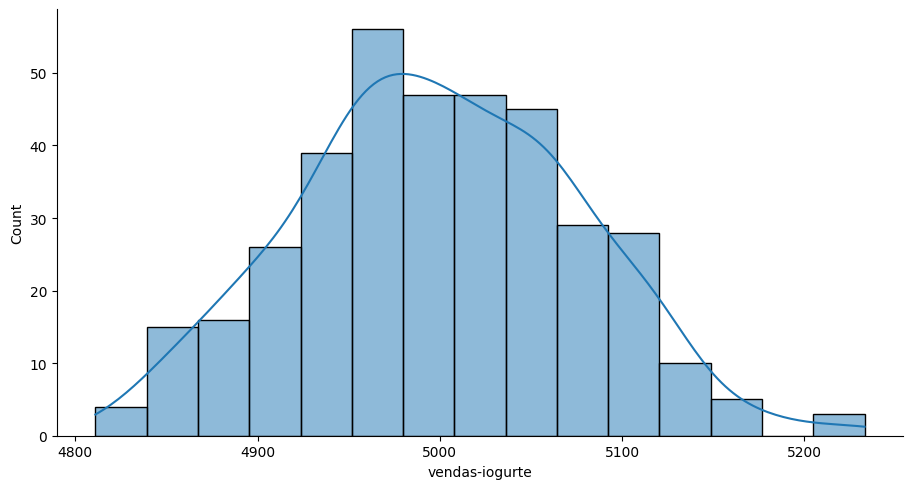

In [110]:
ax = sns.displot(estoque_df['vendas-iogurte'], kde = True)  ##gráfico de distribuição de frequências
ax.figure.set_size_inches(10,5)
ax

Text(0.5, 1.0, 'Vendas')

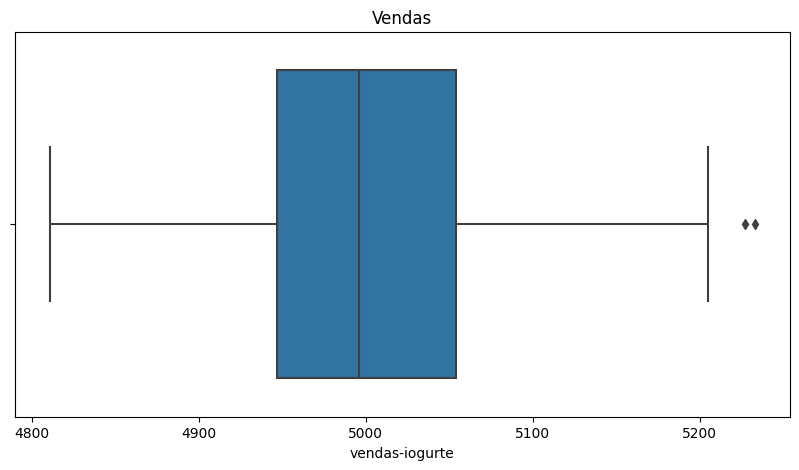

In [111]:
ax = sns.boxplot(x = 'vendas-iogurte', data = estoque_df, orient = 'h')
ax.figure.set_size_inches(10,5)
ax.set_title('Vendas')

In [112]:
#cálculo do coeficiente de assimetria que mede o grau de simetria da curva, em relação a distribuição normal
estoque_df['vendas-iogurte'].skew().round(2) # em dados normalmente distribuídos, a assimetria é bem próxima de zero)

0.1

In [113]:
significancia = 0.05  ##considerando um nível de significância para realizar o teste de normalidade

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal

In [114]:
stat_test1, pvalor1 = normaltest(estoque_df['vendas-iogurte']) ## teste de normalidade
print(stat_test1)
print(pvalor1)

1.8575448909491343
0.3950383439605143


In [115]:
pvalor1 <= significancia

False

### <font color=green>Resposta para variável "Vendas":</font>

<font color=green>A distribuição normal apresenta simetria em torno da média, além disso, um  das características que definem uma distribuição normal é que as medidas de tendência central (média, mediana e moda) apresentam o mesmo valor, nessa amostra pode-se observar valores muito próximos de média e mediana, o que é possível notar também a partir da análise de seu box plot, que contém poucos outliers e aparência próxima da simetria. A moda dos dados também está bem próxima do valor da média, o gráfico de distribuição apresenta um formato semelhante ao de sino e o coeficiente de assimetria está próximo do zero.

Além disso o teste de normalidade retornou um p-valor = 0.359, considerando um nível de significancia de 0.05, aceitamos a hipótese nula que a amostra da  que a variável "Vendas Iorgute" se assemelha uma distribuição normal.</font>

In [116]:
estoque_df['lead-time'].mean().round(2)  ##cálculo da média

5.09

In [117]:
estoque_df['lead-time'].median()  ##cálculo da mediana

5.0

In [118]:
estoque_df['lead-time'].mode()   ##cálculo da moda

0    5
Name: lead-time, dtype: int64

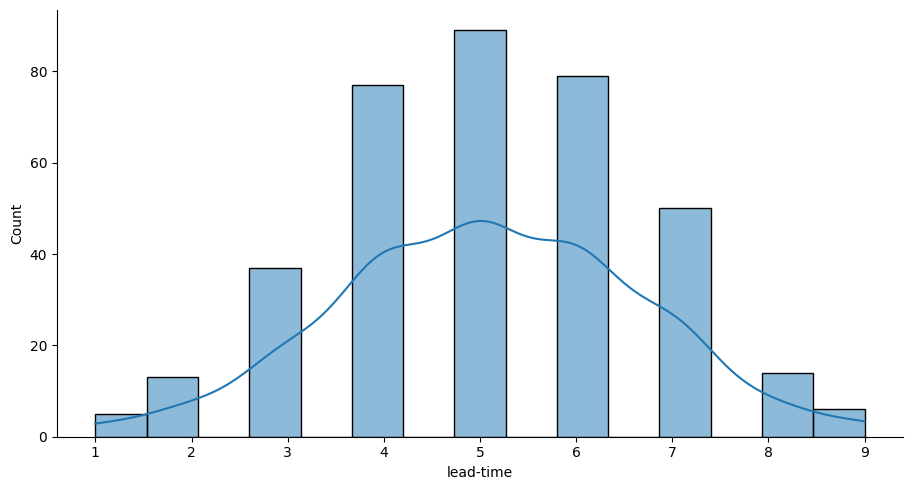

In [119]:
ax = sns.displot(estoque_df['lead-time'], kde = True)
ax.figure.set_size_inches(10,5)
ax

Text(0.5, 1.0, 'Lead time')

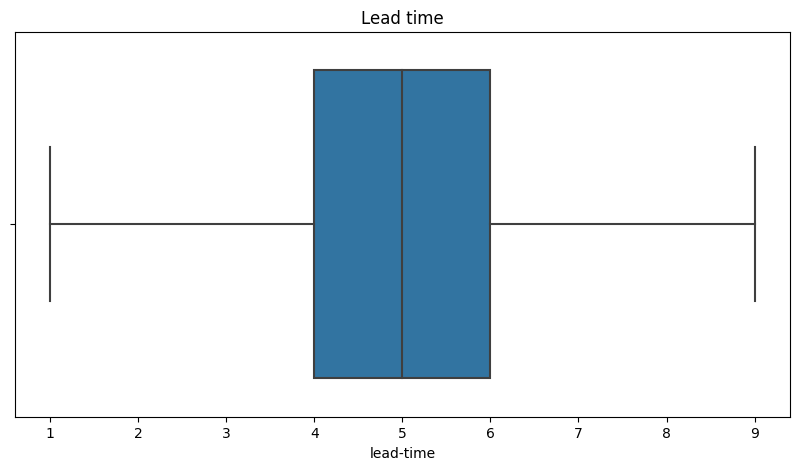

In [120]:
ax = sns.boxplot(x = 'lead-time', data = estoque_df, orient = 'h')
ax.figure.set_size_inches(10,5)
ax.set_title('Lead time')

In [121]:
estoque_df['lead-time'].skew().round(2)

-0.04

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

In [122]:
stat_test2, pvalor2 = normaltest(estoque_df['lead-time']) ## verificando se os dados seguem uma distribuição normal
print(stat_test2)
print(pvalor2)

0.32506746098201145
0.8499874192488579


In [123]:
pvalor2 <= significancia

False

### <font color=green>Resposta para variável "Vendas":</font>

<font color=green> Como citado anteriormente, as medidas de tendência central (média, mediana e moda) de mesmo valor são uma indicação de distribuição normal, o que pode ser confirmado a partir da análise do box-plot simétrico dos dados, e também do histograma plotado acima. O coeficiente de assimetria próximo do zero, assim como o teste de normalidade realizado acima são indicativos que os dados da variável "Lead Time" possuem uma distribuição normal.</font>

## 2. Assuma que:

a. Os dados seguem uma distribuição normal.

b. O time de vendas utilize para o produto em questão o nível de serviço de 99,87%

c. O produto não tem sazonalidade (todos os meses vende valores próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

### Calcule, com os dados fornecidos, o estoque de segurança desejado

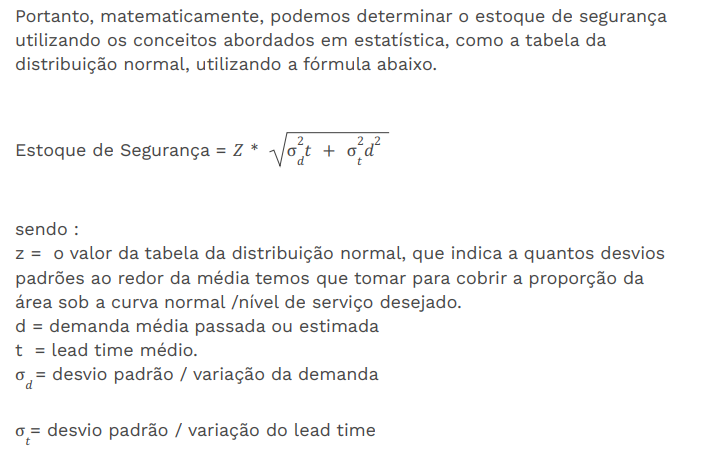

In [124]:
nivel_servico = 0.9987
nivel_servico

0.9987

Determinando o valor de z

In [125]:
z = norm.ppf(nivel_servico)
z

3.011453758499792

In [126]:
d = estoque_df['vendas-iogurte'].mean()
d

4999.1702702702705

In [127]:
t = estoque_df['lead-time'].mean()
t.round(2)

5.09

In [128]:
desvio_demanda = estoque_df['vendas-iogurte'].std()
desvio_demanda.round(2)

77.29

In [129]:
desvio_lead = estoque_df['lead-time'].std()
desvio_lead.round(2)

1.58

In [130]:
estoque = z * np.sqrt(((desvio_demanda**2) * t) + ((desvio_lead**2) * (d**2)))
estoque.round(0)

23773.0

In [131]:
print(f'O estoque de segurança, aproximado, dado o conjunto de dados avaliado é de 23773 iogurtes')

O estoque de segurança, aproximado, dado o conjunto de dados avaliado é de 23773 iogurtes


### <font color=green> Resposta:

Considerando que a média de vendas é de aproximadamente 5k e o tempo de leadtime para ressuprimento é de 5 dias, o estoque mínimo para não sofrer as osciliações deve ser próximo de 23773. </font>

---

# <font color=green>Challenge Teste de Hipóteses</font>

## <font color=blue>Desafio 1: Cosméticos</font>

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O Time de produtos dessa empresa está interessado criar novos batons com maior durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da
empresa as seguintes perguntas a serem respondidas:

1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com
formulas diferentes?

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com
relacao a idade?

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior
durabilidade e exposicao ao sol?

*Será analisado inicialmente se as amostras dos batons de formula 1, 2 e 3 são provenientes de uma distribuição normal, tendo como hipótese nula:*

*H0: Amostra proviniente de uma distribuição normal*

In [132]:
import pandas as pd   ##importando bibliotecas
from scipy.stats import normaltest
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import DescrStatsW
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
dados = pd.read_csv("desafio_01_cosmeticos.csv")  ##leitura dos dados
#dados = pd.read_csv("/content/sample_data/desafio_01_cosmeticos_challenge_testehipoteses-230206-120438.csv")
dados.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1


In [136]:
dados.describe().round(2)

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.00,300.00,300.00,300.00,300.00
mean,2.00,150.50,17.13,36.89,0.44
std,0.82,86.75,10.94,12.63,0.50
min,1.00,1.00,5.00,18.00,0.00
25%,1.00,75.75,9.00,26.00,0.00
50%,2.00,150.50,14.00,36.00,0.00
75%,3.00,225.25,20.00,48.00,1.00
max,3.00,300.00,48.00,60.00,1.00


In [137]:
significancia = 0.05

In [138]:
prod_1 = dados.query('id_produto == 1').durabilidade  ##seleção dos dados de durabilidade do produto 1
prod_1.head()

0    12
2    19
3    14
4    17
5    14
Name: durabilidade, dtype: int64

In [139]:
stat_test1, pvalor1 = normaltest(prod_1) ## verificando se os dados seguem uma distribuição normal
print(stat_test1)
print(pvalor1)

96.02641355261086
1.4064660019609044e-21


In [140]:
pvalor1 <= significancia

True

Considerando $H_0$ que os dados são provinientes de uma distribuição normal, temos que $p\leq 0,05$, rejeitando assim a hipótese nula.

In [142]:
prod_2 = dados.query('id_produto == 2').durabilidade ##seleção dos dados de durabilidade do produto 2
prod_2.head()

1     5
9     7
13    5
14    9
15    7
Name: durabilidade, dtype: int64

In [143]:
stat_test2, pvalor2 = normaltest(prod_2) ## verificando se os dados seguem uma distribuição normal
print(stat_test2)
print(pvalor2)

16.384994610596173
0.0002767219614086259


In [144]:
pvalor2 <= significancia

True

Hipótese nula de distribuição normal rejeitada.

In [145]:
prod_3 = dados.query('id_produto == 3').durabilidade ##seleção dos dados de durabilidade do produto 3
prod_3.head()

10    31
11    28
12    38
19    26
23    30
Name: durabilidade, dtype: int64

In [146]:
stat_test3, pvalor3 = normaltest(prod_3) ## verificando se os dados seguem uma distribuição normal
print(stat_test3)
print(pvalor3)

28.77341246593411
5.648496581565088e-07


In [147]:
pvalor2 <= significancia

True

O teste realizado a amostra do batom de fórmula 3 não é proviniente de uma distribuição normal.


**Considerando que as amostras não seguem uma distribuição normal, será necessário a utilização do teste não paramétrico Kruskal-Wallis  para verificar se temos diferença significativa na média de durabilidade dos produtos.**

H0: A durabilidade do batom é a mesma para todos os grupos de dados

H1: A durabilidade é diferente para todos os grupos de dados

In [148]:
stats_total, pvalor_total = stats.kruskal(prod_1, prod_2, prod_3)
print(stats_total)
print(pvalor_total)

227.46096368302588
4.050226510971091e-50


In [149]:
pvalor_total <= significancia

True

### <font color=green> Resposta:

Considerando o resultado do teste Kruskal-Wallis, tendo o p-valor menor do que a significancia de 0.05, rejeita-se a hipótese nula de que a durabilidade é a mesma para o 3 tipos de cosméticos. </font>

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relacao a idade?

In [150]:
produto_sol = dados.query('exposicao_sol == 1')
produto_sol.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
3,1,4,14,36,1
4,1,5,17,46,1
5,1,6,14,56,1
6,1,7,12,29,1


In [151]:
produto_sol.query('id_produto == 1').mean()[['durabilidade']] ##média de durabilidade do produto 1 com exposição ao sol

durabilidade    11.911111
dtype: float64

In [152]:
produto_sol.query('id_produto == 1').std()[['durabilidade']] ##desvio de durabilidade do produto 1 com exposição ao sol

durabilidade    1.578581
dtype: float64

In [153]:
produto_sol.query('id_produto == 2').mean()[['durabilidade']] ##média de durabilidade do produto 2 com exposição ao sol

durabilidade    7.5625
dtype: float64

In [154]:
produto_sol.query('id_produto == 2').std()[['durabilidade']]  ##desvio de durabilidade do produto 2 com exposição ao sol

durabilidade    1.809035
dtype: float64

In [155]:
produto_sol.query('id_produto == 3').mean()[['durabilidade']] ##média de durabilidade do produto 3 com exposição ao sol

durabilidade    20.102564
dtype: float64

In [156]:
produto_sol.query('id_produto == 3').std()[['durabilidade']] ##desvio de durabilidade do produto 3 com exposição ao sol

durabilidade    8.466015
dtype: float64

In [157]:
produto_naosol = dados.query('exposicao_sol == 0')
produto_naosol.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
1,2,2,5,36,0
2,1,3,19,47,0
8,1,9,18,27,0
10,3,11,31,21,0
11,3,12,28,26,0


In [158]:
#intervalo interquartil.
print(produto_sol.query('id_produto == 1').quantile(q=0.75) - produto_sol.query('id_produto == 1').quantile(q=0.25))
print(produto_sol.query('id_produto == 2').quantile(q=0.75) - produto_sol.query('id_produto == 2').quantile(q=0.25))
print(produto_sol.query('id_produto == 3').quantile(q=0.75) - produto_sol.query('id_produto == 3').quantile(q=0.25))

id_produto         0.0
id_voluntária    119.0
durabilidade       2.0
idade             16.0
exposicao_sol      0.0
dtype: float64
id_produto         0.00
id_voluntária    150.75
durabilidade       3.00
idade             22.00
exposicao_sol      0.00
dtype: float64
id_produto         0.0
id_voluntária    140.0
durabilidade       9.0
idade             12.5
exposicao_sol      0.0
dtype: float64


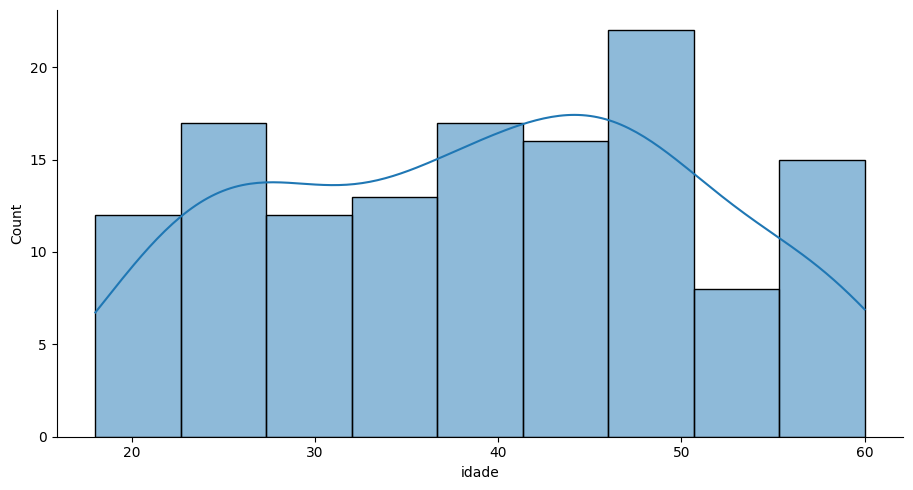

In [159]:
ax = sns.displot(produto_sol["idade"], kde = True)
ax.figure.set_size_inches(10,5)
ax

<Axes: >

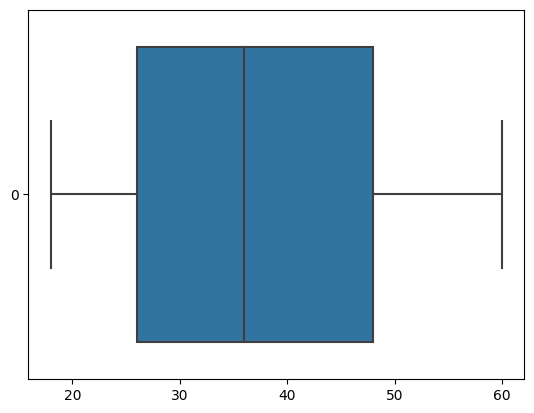

In [160]:
sns.boxplot(dados["idade"],orient='h')

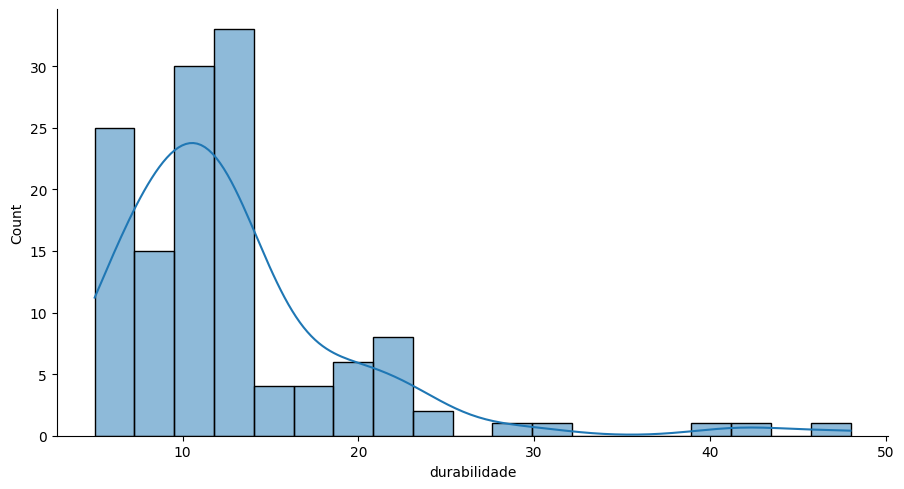

In [161]:
ax = sns.displot(produto_sol["durabilidade"], kde = True)
ax.figure.set_size_inches(10,5)
ax

<Axes: >

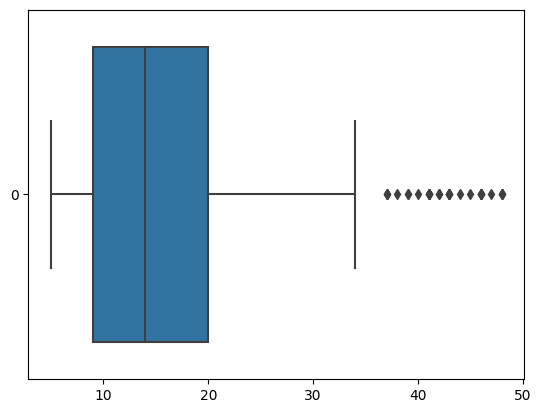

In [162]:
sns.boxplot(dados["durabilidade"],orient='h')

In [163]:
produto_sol.corr()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
id_produto,1.000000,0.255433,0.442645,0.269866,NaN
id_voluntária,0.255433,1.000000,0.125548,0.147184,NaN
durabilidade,0.442645,0.125548,1.000000,0.089011,NaN
idade,0.269866,0.147184,0.089011,1.000000,NaN
exposicao_sol,NaN,NaN,NaN,NaN,NaN


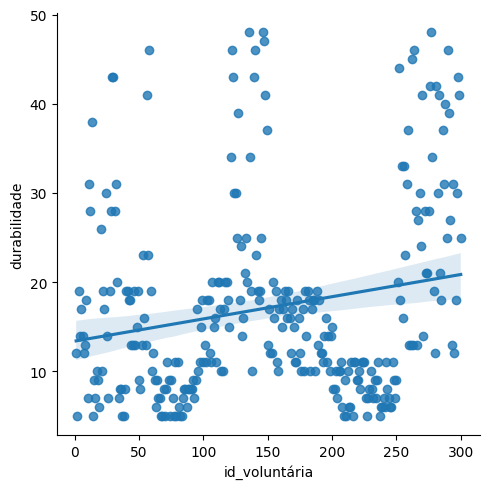

In [164]:
sns.lmplot(data=dados, x="id_voluntária", y="durabilidade")

In [165]:
#Testando H0 --> Se não há diferença do produto em relação a  durabilidade na idade das voluntárias quando expostas ao sol
desvio_padrao = produto_sol.durabilidade.std()
media =  produto_sol.durabilidade.mean()
n=1000

amostra = np.random.normal(loc=media,scale=desvio_padrao,size=n)


estatistica_teste,p_valor =ztest(amostra,value=media)
if p_valor <= significancia:
  resultado = f'Rejeita H0: Média menor que {media}'
else:
  resultado =  f'Não rejeita H0'
print(f'media={media}',resultado)



media=12.75 Não rejeita H0


### <font color=green> Resposta:

Considerando o resultado das médias da durabilidade dos produtos quando expostos ao sol,a durabilidade vária conforme a idade das voluntárias </font>

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol?

In [166]:
import statsmodels.stats.weightstats as test_t
#Teste t de Student --> Comparando as médias e apresentando as diferenças significativas

In [167]:
resultado_teste_t1 = test_t.ttest_ind(produto_sol.query('id_produto == 1'),produto_sol.query('id_produto == 2'),alternative = 'two-sided' )
print('valor p do teste', resultado_teste_t1[1])

valor p do teste [0.00000000e+00 8.91073891e-02 4.32215311e-21 7.22606328e-01
            nan]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


In [168]:
resultado_teste_t2 = test_t.ttest_ind(produto_sol.query('id_produto == 1'),produto_sol.query('id_produto == 3'),alternative = 'two-sided' )
print('valor p do teste', resultado_teste_t2[1])

valor p do teste [0.00000000e+00 2.60631165e-03 1.03723342e-08 7.07912204e-04
            nan]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


In [169]:
resultado_teste_t3= test_t.ttest_ind(produto_sol.query('id_produto == 2'),produto_sol.query('id_produto == 3'),alternative = 'two-sided' )
print('valor p do teste', resultado_teste_t3[1])

valor p do teste [0.00000000e+00 1.80012499e-01 5.19317998e-16 5.05969095e-03
            nan]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: invalid value encountered in true_divide
  tstat = (value1 - value2 - diff) / std_diff


In [170]:
from statsmodels.stats.power import TTestPower

In [171]:

delta_mean =  produto_sol['durabilidade'].mean() -  produto_sol['exposicao_sol'].mean()
print('delta_mean: % 2f' %delta_mean)
delta_desvio =  produto_sol['durabilidade'].std() - produto_sol['exposicao_sol'].std()
print('delta_desvio: % 2f' %delta_desvio)
effect_size = delta_mean/delta_desvio
print('effect_size: % 2f' %effect_size)

#from statsmodels.stats.power import TTestIndPower
power= TTestPower()
resultado_f = power.solve_power(effect_size=effect_size, alpha=0.05, power=None,
                    nobs=40, alternative='two-sided')
print('power: % 2f' %resultado_f)

delta_mean:  11.750000
delta_desvio:  6.999864
effect_size:  1.678604
power:  1.000000


### <font color=green> Resposta:

Considerando o teste t de Student para comparar as amostras, com base em sua durabildiade diante da exposição do sol, percebe-se que o produto que apresenta maior desempenho é o produto 3  </font>

---

# <font color=green>Challenge Teste de Hipóteses</font>

# <font color=blue>Desafio 2: Empresa de Picolé</font>

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição  normal com média igual a R$7,85
e desvio padrão igual a R$3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import norm
from scipy.stats import normaltest
import math

# Hipótese do nosso modelo:

## H0: u = 7,85
## H1: u != 7,85

## 1.Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

### Definindo a significância do teste ($\alpha$)

In [173]:
significancia = 0.05

### Testando a variável:

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

### <font color='green'>Resposta: Sim podemos concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia, pois o p valor foi menor que a significancia 0.05.</font>

## 2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

### <font color='green'>Resposta: O valor da variavel teste é R$ 7.85.</font>

In [174]:
media_preco = 11.52
media_preco

11.52

In [175]:
desvio_padrao_preco = 3.32
desvio_padrao_preco

3.32

In [176]:
media_distr = 7.85
significancia = 0.05
confianca = 1 - significancia
n_picoles = 45

# Hipótese do nosso modelo:

## H0: u = 7,85
## H1: u != 7,85

In [177]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

### <font color='green'>Resposta: Intervalo de Confiança.</font>

In [178]:
probabilidade = confianca
probabilidade

0.95

### Obtendo $z_{\alpha/2}$

In [179]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.6448536269514722

In [180]:
z = (media_preco - media_distr) / (desvio_padrao_preco / np.sqrt(n_picoles))
z

7.415394106106231

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [181]:
z <= -z_alpha_2

False

In [182]:
z >= z_alpha_2

True

### <font color='green'>Resposta: P valor.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [183]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

1.212363542890671e-13

In [184]:
p_valor = 2 * (norm.sf(z))
p_valor

1.2126366281061861e-13

In [185]:
p_valor <= significancia

True

### <font color='green'>Resposta: Como a média amostral $\bar{x}$ é significativamente maior que R$ 7.85, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para unificar os preços dos picolés.</font>

---

# <font color=green>Challenge Correlação e Regressão</font>

## <font color=blue>Desafio Análise de Correlação:</font>

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores podem perder a venda. Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as seguintes informações:

● **id** : código identificador do imóvel

● **date**: data em que o imóvel foi cadastrado

● **price**: preço do imóvel

● **bedrooms**: número de quartos

● **bathrooms:** número de banheiros

● **sqft_living**: tamanho do imóvel (dentro da casa)

● **sqft_lot**: tamanho do lote / terreno

● **floors**: andares

● **waterfront**: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

● **view**: indica o número de quartos com vista.

● **condition**: condição do imóvel, escala de 1 a 5

● **grade**: nota do imóvel

● **sqft_above**: tamanho da casa acima do solo (excluindo porão)

● **sqft_basement**: tamanho do porão

● **yr_built**: ano em que a casa foi construída

● **yr_renovated**: ano em que a casa foi renovada

● **zipcode**: "CEP" do imóvel

● **lat**: latitude do imóvel

● **long**: longitude do imóvel


In [186]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [189]:
# lendo o dataset
dataset = pd.read_csv('desafio_01_preco_imoveis.csv')

In [190]:
# Verificando o tamanho do dataset
dataset.shape

(21613, 19)

In [191]:
# imprimir as informações do dataset
dataset.info()
# o dataset possui um total de 19 colunas. 13 delas são do tipo "int64", enquanto 5 delas são do tipo "float64" e uma única do tipo "object",
# que é uma string representando a data em que o imóvel foi cadastrado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [192]:
# mostrando as primeiras 5 linhas do dataset
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,475.112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,477.379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,475.208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,476.168,-122.045


In [193]:
# verificando o resumo estatístico das variáveis numéricas
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,431.096689,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,130.652407,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.184000,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,473.849000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,475.524000,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,476.694000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,477.776000,-121.315000


In [194]:
# verificando a distribuição da variável categórica
dataset.describe(include=['O'])

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [195]:
# verificando se há valores ausentes
dataset.isnull().sum()
# o dataset não possui valores ausentes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

### **RESPONDENDO A PERGUNTA 1**

1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [196]:
# calculando a matriz de correlação entre todas as colunas numéricas do dataset e atribuindo o resultado à variável dfcorrelacao
dfcorrelacao = dataset.corr()

<ipython-input-196-7f35f997c424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorrelacao = dataset.corr()


In [197]:
# criando um novo dataframe dada a matriz de correlação calculada anteriormente
dfcorrelacao =  pd.DataFrame(dfcorrelacao)

In [198]:
# exibe as primeiras linhas 5 do dataFrame dfcorrelacao
dfcorrelacao.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.003999,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.007104,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.005245,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,-0.001412,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,-0.002022,0.240223


**Variáveis mais correlacionadas?**

In [199]:
# exibindo as 6 variáveis mais correlacionadas com a variável 'price' e ordenando o novo DataFrame pela coluna 'price' em ordem decrescente
correlacao_maior = dfcorrelacao.sort_values(by = 'price', ascending = False)
# exibindo os primeiros 6 resultados da coluna 'price'
correlacao_maior['price'].head(6)

price          1.000000
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
bathrooms      0.525138
view           0.397293
Name: price, dtype: float64

**Variáveis menos correlacionadas?**


In [200]:
# exibindo as 6 variáveis menos correlacionadas com a variável 'price' e ordenando o novo DataFrame pela coluna 'price' em ordem decrescente
correlacao_menor = dfcorrelacao.sort_values(by = 'price', ascending = True)
# exibindo os primeiros 6 resultados da coluna 'price'
correlacao_menor['price'].head(6)

zipcode     -0.053203
id          -0.016762
lat          0.007104
long         0.021626
condition    0.036362
yr_built     0.054012
Name: price, dtype: float64

### **RESPONDENDO A PERGUNTA 2**

2 - Para as top 5 variáveis mais correlacionadas com o preço:

*2.1 plote as suas distribuições (histograma e boxplot)*

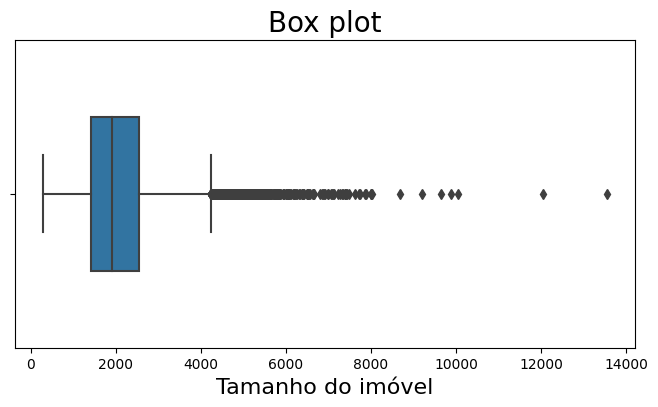

In [201]:
# criamos um gráfico do tipo boxplot com a variável 'sqft_living' do dataset
# definimos a orientação horizontal e a largura das barras como 0.5
ax = sns.boxplot(data = dataset, x='sqft_living', orient = 'h', width = 0.5)
# definimos o tamanho da figura do gráfico como 8x4 polegadas
ax.figure.set_size_inches(8,4)
# adicionamos um título ao gráfico com tamanho de fonte de 20
ax.set_title('Box plot', fontsize = 20)
# adicionamos uma legenda ao eixo x do gráfico com tamanho de fonte de 16
ax.set_xlabel('Tamanho do imóvel', fontsize = 16)
# exibe o gráfico
_= ax

<ipython-input-202-2e7801413c67>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['sqft_living'])


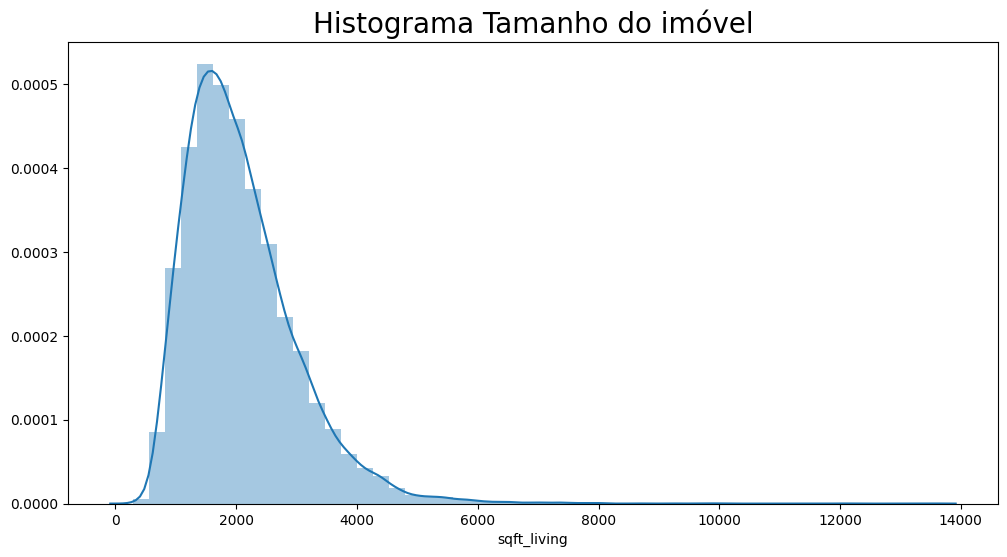

In [202]:
# criamos um histograma da coluna 'sqft_living' do conjunto de dados 'dataset'
ax = sns.distplot(dataset['sqft_living'])
# definimos o tamanho da figura
ax.figure.set_size_inches(12, 6)
# definimos o título do gráfico e o tamanho da fonte
ax.set_title('Histograma Tamanho do imóvel', fontsize=20)
# definimos o rótulo do eixo y como vazio e o tamanho da fonte
ax.set_ylabel('', fontsize=16)
# exibe o gráfico
_= ax

<Axes: >

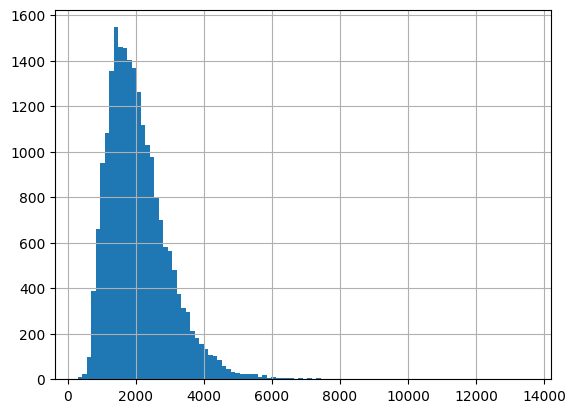

In [203]:
dataset.sqft_living.hist(bins = 100)

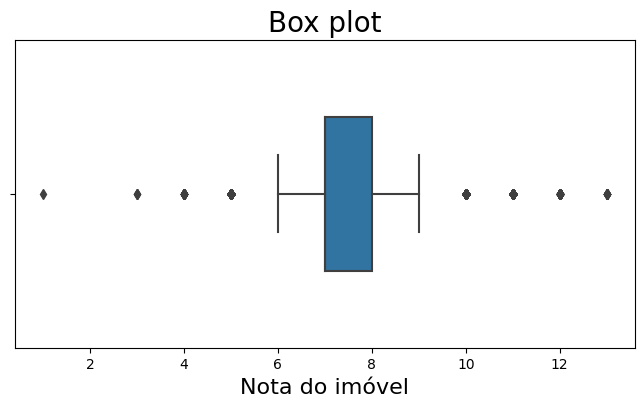

In [204]:
ax = sns.boxplot(data = dataset, x='grade', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Nota do imóvel', fontsize = 16)
_= ax

<ipython-input-205-b14eae52b963>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['grade'])


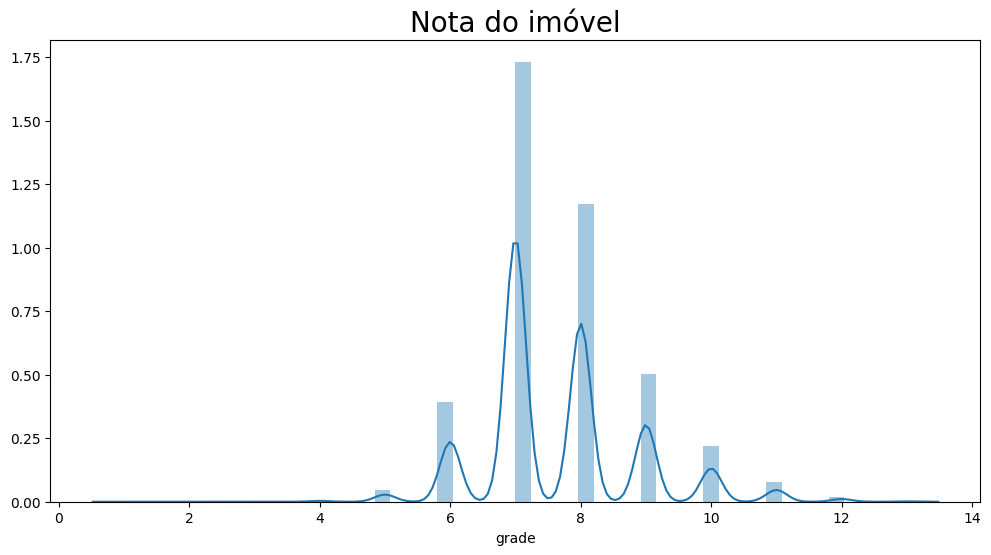

In [205]:
ax = sns.distplot(dataset['grade'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Nota do imóvel', fontsize=20)
ax.set_ylabel('', fontsize=16)
_= ax

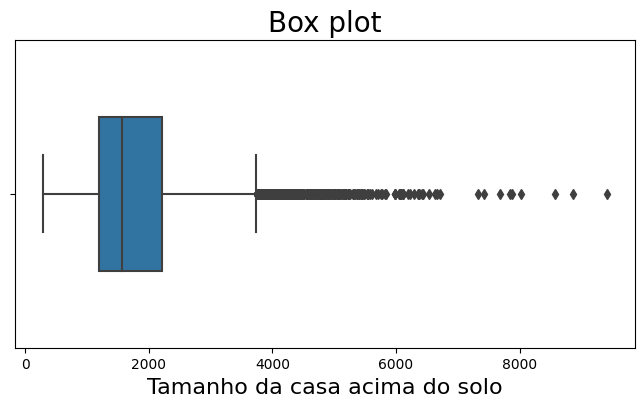

In [206]:
ax = sns.boxplot(data = dataset, x='sqft_above', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Tamanho da casa acima do solo', fontsize = 16)
_= ax

<Axes: >

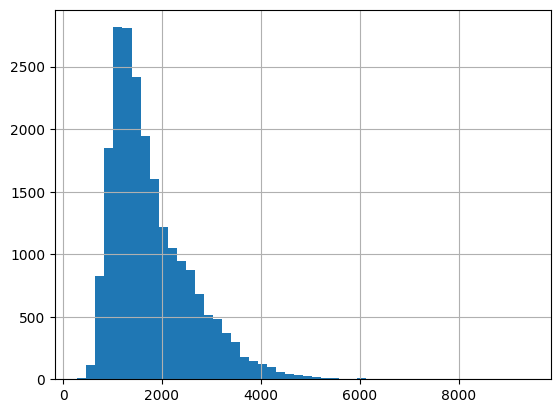

In [207]:
dataset.sqft_above.hist(bins = 50)

<ipython-input-208-f6142bb06678>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['sqft_above'])


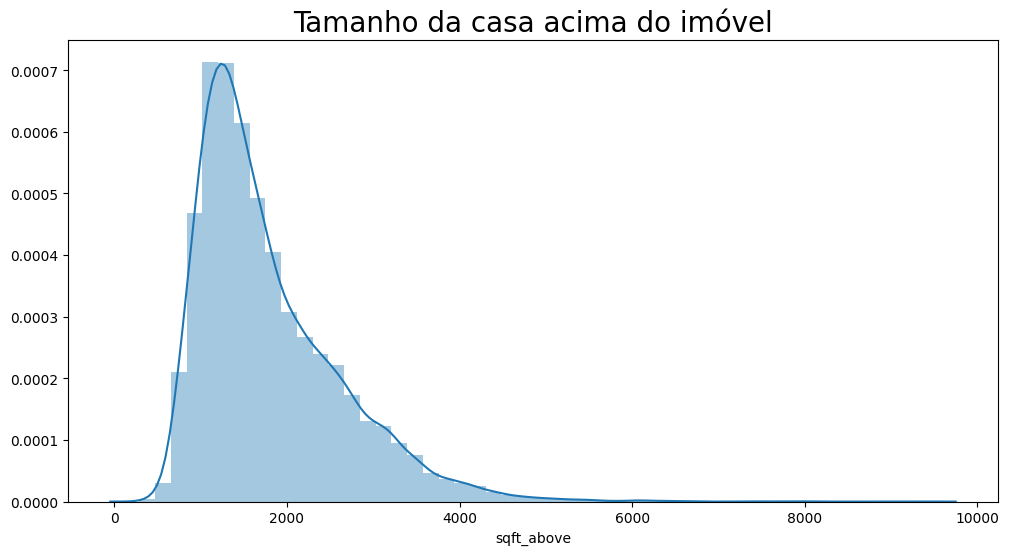

In [208]:
ax = sns.distplot(dataset['sqft_above'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Tamanho da casa acima do imóvel', fontsize=20)
ax.set_ylabel('', fontsize=16)
_= ax

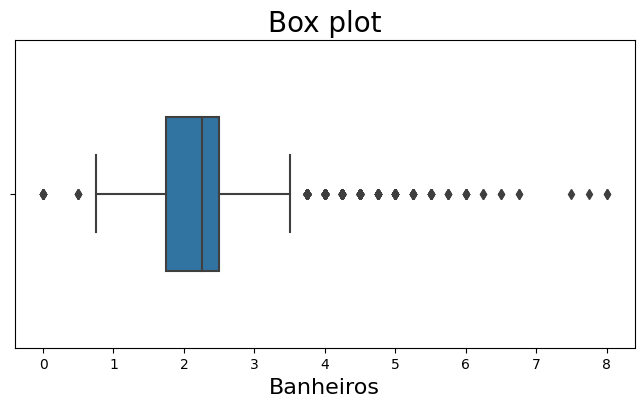

In [209]:
ax = sns.boxplot(data = dataset, x='bathrooms', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Banheiros', fontsize = 16)
_= ax

<Axes: >

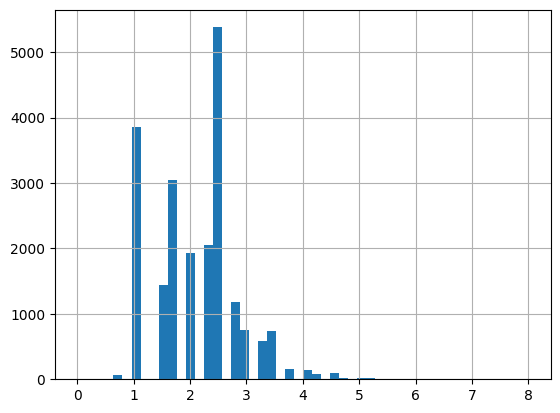

In [210]:
dataset.bathrooms.hist(bins = 50)

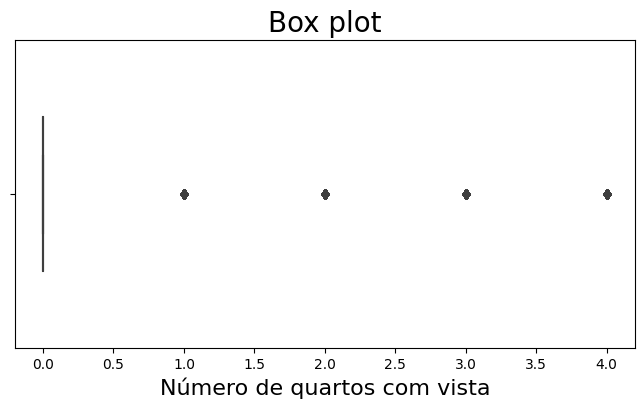

In [211]:
ax = sns.boxplot(data = dataset, x='view', orient = 'h', width = 0.5)
ax.figure.set_size_inches(8,4)
ax.set_title('Box plot', fontsize = 20)
ax.set_xlabel('Número de quartos com vista', fontsize = 16)
_= ax

<Axes: >

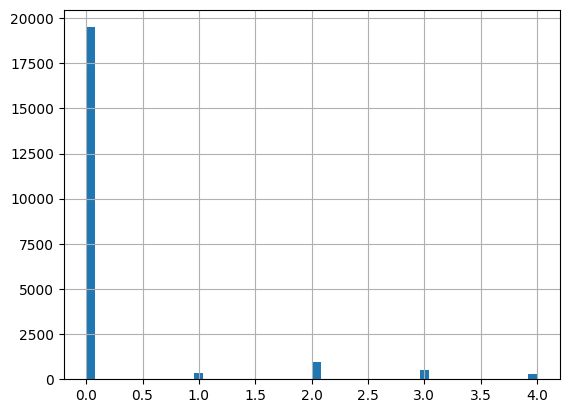

In [212]:
dataset.view.hist(bins = 50)

*2.2 plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a variável correlacionada no eixo X.*

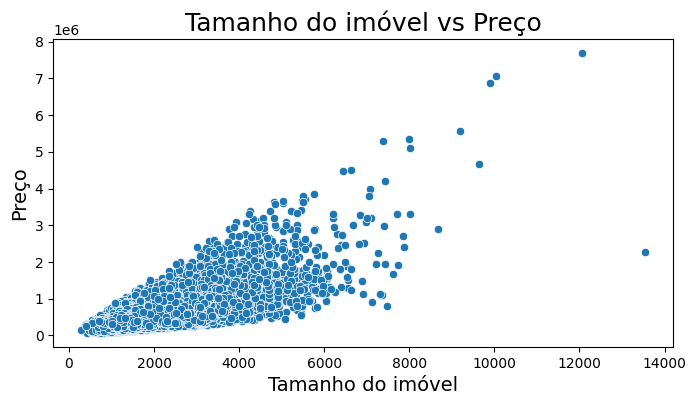

In [213]:
ax = sns.scatterplot(x=dataset.sqft_living, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Tamanho do imóvel vs Preço', fontsize=18)
ax.set_xlabel('Tamanho do imóvel', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

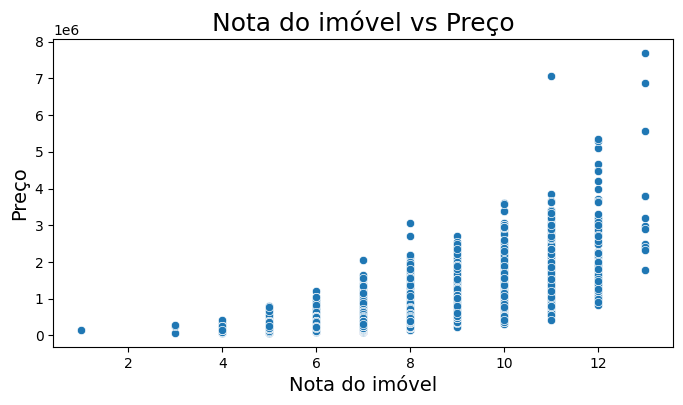

In [214]:
ax = sns.scatterplot(x=dataset.grade, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Nota do imóvel vs Preço', fontsize=18)
ax.set_xlabel('Nota do imóvel', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

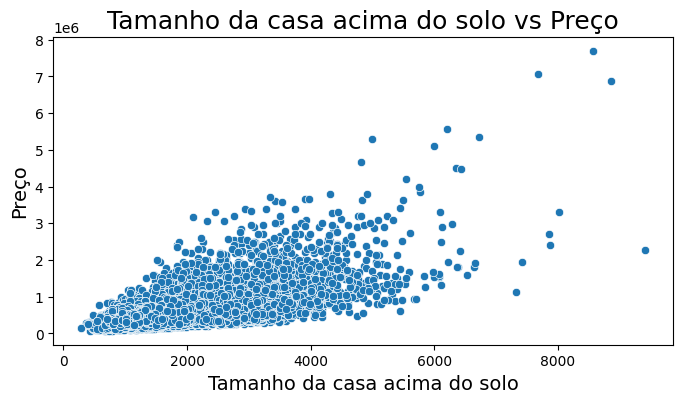

In [215]:
ax = sns.scatterplot(x=dataset.sqft_above, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Tamanho da casa acima do solo vs Preço', fontsize=18)
ax.set_xlabel('Tamanho da casa acima do solo', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

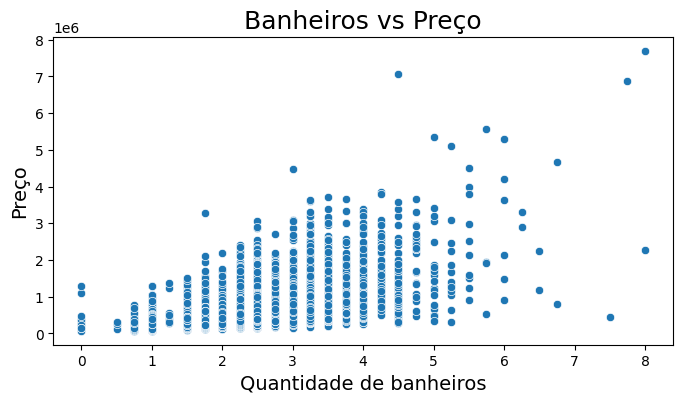

In [216]:
ax = sns.scatterplot(x=dataset.bathrooms, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Banheiros vs Preço', fontsize=18)
ax.set_xlabel('Quantidade de banheiros', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

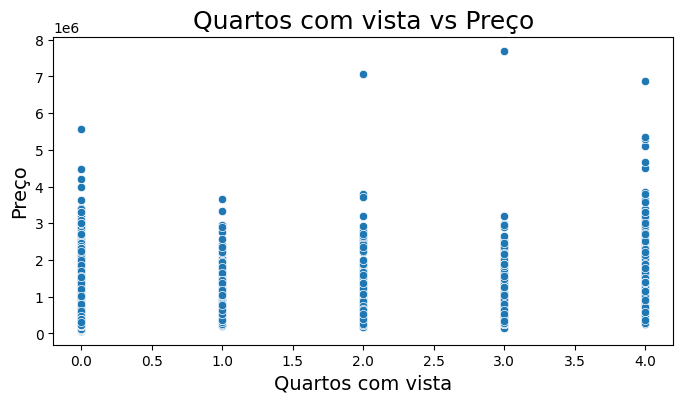

In [217]:
ax = sns.scatterplot(x=dataset.view, y=dataset.price)
ax.figure.set_size_inches(8,4)
ax.set_title('Quartos com vista vs Preço', fontsize=18)
ax.set_xlabel('Quartos com vista', fontsize=14)
ax.set_ylabel('Preço', fontsize=14)
_= ax

*2.3 para cada uma das 5 variáveis faça uma regressão linear simples sendo preciso a variável resposta (y) e interprete os resultados.*

In [218]:
# variável dependente (preço)
Y = dataset.price
# adiciona uma coluna de 1's na variável independente para incluir o intercepto
X = sm.add_constant(dataset.sqft_living)

In [219]:
# cria o modelo de regressão
resultado_regressao = sm.OLS(Y, X).fit()

In [220]:
# imprime o resumo do modelo
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:00:43   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

Através da análise, foi calculado um coeficiente que nos diz quanto o preço do imóvel muda em relação à área da casa. Nesse caso, o coeficiente é de 280.6236, o que significa que, em média, o preço do imóvel aumenta em 280.62 dólares para cada aumento de 1 unidade na área da casa (em pés quadrados).

O valor de R-quadrado (R-squared) de 0,493 indica que cerca de 49,3% da variação no preço do imóvel é explicada pela área do imóvel.


In [221]:
# criamos uma cópia do dataset original e atribuimos a uma nova variável chamada dataset2
dataset2 = dataset.copy()

In [222]:
# criamos uma nova coluna que contém as previsões da regressão linear simples
dataset2['Y_previsto'] = resultado_regressao.predict()

In [223]:
# selecionamos as colunas
dataset2[['price','sqft_living','Y_previsto']].round(2)

,price,sqft_living,Y_previsto
0,221900.0,1180,287555.07
1,538000.0,2570,677621.83
2,180000.0,770,172499.40
3,604000.0,1960,506441.45
4,510000.0,1680,427866.85
...,...,...,...
21608,360000.0,1530,385773.32
21609,400000.0,2310,604659.70
21610,402101.0,1020,242655.30
21611,400000.0,1600,405416.97


A partir dos resultados da regressão linear simples, podemos interpretar que a variável "sqft_living" (tamanho da casa) é um preditor significativo do preço das casas. Isso é indicado pelo valor do coeficiente de regressão estimado para a variável "sqft_living" ser positivo e significativo, o que sugere que o aumento no tamanho da casa leva a um aumento no preço da casa.

O valor do intercepto (constante) na equação da regressão (Y_previsto = -43580.74309447 + 280.6235679 * sqft_living) indica que, se uma casa não tem nenhum tamanho (área), seu preço seria em média de -43580.74 (o que não faz sentido na prática).

Além disso, o valor do R² de 0.49 indica que o modelo de regressão explica cerca de 49% da variabilidade nos preços das casas.

In [224]:
# criamos uma variável chamada Y que armazena os valores da variável resposta price do dataset.
Y = dataset.price
# criamos uma variável chamada X que contém os valores da variável explicativa grade do dataset
X = sm.add_constant(dataset.grade)

In [225]:
# cria o modelo de regressão
resultado_regressao = sm.OLS(Y, X).fit()

In [226]:
# imprime o resultado do modelo
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:00:43   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.056e+06   1.23e+04    -86.166      0.0

Através da análise da regressão linear entre o preço do imóvel e a nota de classificação da casa (grade), foi calculado um coeficiente de 208.5026, o que significa que, em média, o preço do imóvel aumenta em 208.50 dólares para cada aumento de 1 unidade na nota de classificação da casa.

O valor de R-quadrado (R-squared) de 0.445 indica que cerca de 44,5% da variação no preço do imóvel é explicada pela nota de classificação da casa. Ou seja, a nota de classificação da casa tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pela nota de classificação da casa.

In [227]:
# adicionamos uma nova coluna chamada 'Y_previsto2' com os valores preditos pelo modelo de regressão linear múltipla
dataset2['Y_previsto2'] = resultado_regressao.predict()

In [228]:
# criamos um novo DataFrame com as colunas "price", "grade", "Y_previsto" e "Y_previsto2", com valores arredondados para 2 casas decimais.
dataset2[['price','grade','Y_previsto','Y_previsto2']].round(2)

,price,grade,Y_previsto,Y_previsto2
0,221900.0,7,287555.07,403157.96
1,538000.0,7,677621.83,403157.96
2,180000.0,6,172499.40,194700.40
3,604000.0,7,506441.45,403157.96
4,510000.0,8,427866.85,611615.52
...,...,...,...,...
21608,360000.0,8,385773.32,611615.52
21609,400000.0,8,604659.70,611615.52
21610,402101.0,7,242655.30,403157.96
21611,400000.0,8,405416.97,611615.52


A tabela apresenta as colunas "price", "grade", "Y_previsto" e "Y_previsto2". "Price" é o preço real do imóvel, "grade" é a avaliação do imóvel (numa escala de 1 a 13), "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear e "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear.

Comparando as colunas "Y_previsto" e "Y_previsto2", percebe-se que o segundo modelo, que inclui mais variáveis explicativas, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas.

In [229]:
# define a variável Y como a coluna 'price' do dataset
Y = dataset.price
# define a variável X como a coluna 'sqft_above' do dataset e adiciona uma constante (intercepto) à variável X
X = sm.add_constant(dataset.sqft_above)
# executa a regressão linear com a variável Y como variável dependente e a variável X como variável independente
resultado_regressao = sm.OLS(Y, X).fit()
# imprime o sumário dos resultados da regressão l
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 1.251e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:00:43   Log-Likelihood:            -3.0267e+05
No. Observations:               21613   AIC:                         6.053e+05
Df Residuals:                   21611   BIC:                         6.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.995e+04   4729.812     12.676      0.0

Através da análise da regressão linear entre o preço do imóvel e a área do imóvel acima do nível do solo (sqft_above), foi calculado um coeficiente de 268.4732, o que significa que, em média, o preço do imóvel aumenta em 268.47 dólares para cada aumento de 1 unidade na área do imóvel acima do nível do solo.

O valor de R-quadrado (R-squared) de 0.367 indica que cerca de 36.7% da variação no preço do imóvel é explicada pela área do imóvel acima do nível do solo. Ou seja, a área do imóvel acima do nível do solo tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pela área do imóvel acima do nível do solo.

In [230]:
dataset2['Y_previsto3'] = resultado_regressao.predict()
dataset2[['price','sqft_above','Y_previsto','Y_previsto2','Y_previsto3']].round(2)

,price,sqft_above,Y_previsto,Y_previsto2,Y_previsto3
0,221900.0,1180,287555.07,403157.96,376751.55
1,538000.0,2170,677621.83,403157.96,642540.01
2,180000.0,770,172499.40,194700.40,266677.55
3,604000.0,1050,506441.45,403157.96,341850.04
4,510000.0,1680,427866.85,611615.52,510988.15
...,...,...,...,...,...
21608,360000.0,1530,385773.32,611615.52,470717.17
21609,400000.0,2310,604659.70,611615.52,680126.26
21610,402101.0,1020,242655.30,403157.96,333795.84
21611,400000.0,1600,405416.97,611615.52,489510.29


A tabela apresentada inclui as colunas "price", "sqft_above", "Y_previsto", "Y_previsto2" e "Y_previsto3". "Price" é o preço real do imóvel, "sqft_above" é a área interna acima do nível do solo em pés quadrados, "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear, "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear e "Y_previsto3" é o preço previsto do imóvel usando o terceiro modelo de regressão linear.

Comparando as colunas "Y_previsto", "Y_previsto2" e "Y_previsto3", é possível observar que o terceiro modelo, que inclui mais variáveis explicativas do que os modelos anteriores, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas. No entanto, é importante lembrar que o modelo mais complexo nem sempre é o melhor, e é necessário avaliar outras métricas de desempenho do modelo, como o erro médio quadrático, para determinar qual modelo é mais adequado para prever os preços dos imóveis.

In [231]:
Y = dataset.price
X = sm.add_constant(dataset.bathrooms)
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:00:43   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.0

Através da análise da regressão linear entre o preço do imóvel e o número de banheiros (bathrooms), foi calculado um coeficiente de 250,320 dólares, o que significa que, em média, o preço do imóvel aumenta em 250,320 dólares para cada aumento de 1 unidade no número de banheiros.

O valor de R-quadrado (R-squared) de 0.276 indica que cerca de 27.6% da variação no preço do imóvel é explicada pelo número de banheiros. Ou seja, o número de banheiros tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pelo número de banheiros.

In [232]:
dataset2['Y_previsto4'] = resultado_regressao.predict()
dataset2[['price','bathrooms','Y_previsto','Y_previsto2','Y_previsto3','Y_previsto4']].round(2)

,price,bathrooms,Y_previsto,Y_previsto2,Y_previsto3,Y_previsto4
0,221900.0,1.00,287555.07,403157.96,376751.55,261034.82
1,538000.0,2.25,677621.83,403157.96,642540.01,573942.97
2,180000.0,1.00,172499.40,194700.40,266677.55,261034.82
3,604000.0,3.00,506441.45,403157.96,341850.04,761687.86
4,510000.0,2.00,427866.85,611615.52,510988.15,511361.34
...,...,...,...,...,...,...
21608,360000.0,2.50,385773.32,611615.52,470717.17,636524.60
21609,400000.0,2.50,604659.70,611615.52,680126.26,636524.60
21610,402101.0,0.75,242655.30,403157.96,333795.84,198453.20
21611,400000.0,2.50,405416.97,611615.52,489510.29,636524.60


A tabela apresentada inclui as colunas "price", "bathrooms", "Y_previsto", "Y_previsto2", e "Y_previsto3". "Price" é o preço real do imóvel, "bathrooms" é o número de banheiros no imóvel, "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear, "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear e "Y_previsto3" é o preço previsto do imóvel usando o terceiro modelo de regressão linear.

Comparando as colunas "Y_previsto", "Y_previsto2" e "Y_previsto3", é possível observar que o terceiro modelo, que inclui mais variáveis explicativas do que os modelos anteriores, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas. No entanto, assim como no caso anterior, é importante lembrar que o modelo mais complexo nem sempre é o melhor, e é necessário avaliar outras métricas de desempenho do modelo, como o erro médio quadrático, para determinar qual modelo é mais adequado para prever os preços dos imóveis.

In [233]:
Y = dataset.price
X = sm.add_constant(dataset.view)
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4050.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:00:43   Log-Likelihood:            -3.0575e+05
No. Observations:               21613   AIC:                         6.115e+05
Df Residuals:                   21611   BIC:                         6.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.955e+05   2396.476    206.759      0.0

Através da análise da regressão linear entre o preço do imóvel e a variável "view" (indicador de qualidade da vista), foi calculado um coeficiente de 190,270. Isso significa que, em média, o preço do imóvel aumenta em 190,270 dólares para cada aumento de 1 unidade na qualidade da vista.

O valor de R-quadrado (R-squared) de 0.158 indica que cerca de 15.8% da variação no preço do imóvel é explicada pela qualidade da vista. Ou seja, a qualidade da vista tem um efeito moderado na explicação do preço do imóvel, mas ainda há uma grande parcela de variação que não é explicada pela qualidade da vista.

In [234]:
dataset2['Y_previsto5'] = resultado_regressao.predict()
dataset2[['price','view','Y_previsto','Y_previsto2','Y_previsto3','Y_previsto4','Y_previsto5']].round(2)

,price,view,Y_previsto,Y_previsto2,Y_previsto3,Y_previsto4,Y_previsto5
0,221900.0,0,287555.07,403157.96,376751.55,261034.82,495491.94
1,538000.0,0,677621.83,403157.96,642540.01,573942.97,495491.94
2,180000.0,0,172499.40,194700.40,266677.55,261034.82,495491.94
3,604000.0,0,506441.45,403157.96,341850.04,761687.86,495491.94
4,510000.0,0,427866.85,611615.52,510988.15,511361.34,495491.94
...,...,...,...,...,...,...,...
21608,360000.0,0,385773.32,611615.52,470717.17,636524.60,495491.94
21609,400000.0,0,604659.70,611615.52,680126.26,636524.60,495491.94
21610,402101.0,0,242655.30,403157.96,333795.84,198453.20,495491.94
21611,400000.0,0,405416.97,611615.52,489510.29,636524.60,495491.94


A tabela apresentada inclui as colunas "price", "view", "Y_previsto", "Y_previsto2", "Y_previsto3", "Y_previsto4" e "Y_previsto5". "Price" é o preço real do imóvel, "view" é o número de vezes que o imóvel foi visualizado, "Y_previsto" é o preço previsto do imóvel usando o primeiro modelo de regressão linear, "Y_previsto2" é o preço previsto do imóvel usando o segundo modelo de regressão linear, "Y_previsto3" é o preço previsto do imóvel usando o terceiro modelo de regressão linear, "Y_previsto4" é o preço previsto do imóvel usando o quarto modelo de regressão linear e "Y_previsto5" é o preço previsto do imóvel usando o quinto modelo de regressão linear.

Comparando as colunas "Y_previsto", "Y_previsto2", "Y_previsto3", "Y_previsto4" e "Y_previsto5", é possível observar que o quinto modelo, que inclui mais variáveis explicativas do que os modelos anteriores, prevê preços mais altos em média. Essa diferença se deve à capacidade do modelo de capturar variações adicionais nos dados através das variáveis adicionadas. No entanto, assim como nos casos anteriores, é importante lembrar que o modelo mais complexo nem sempre é o melhor, e é necessário avaliar outras métricas de desempenho do modelo para determinar qual modelo é mais adequado para prever os preços dos imóveis. Além disso, é importante considerar que o número de visualizações do imóvel pode não ser uma variável causal do preço, mas sim uma variável correlacionada que está relacionada a outras características do imóvel que realmente afetam o preço.





---

# <font color=green>Challenge Modelos Regressivos</font>

## <font color=blue>Desafio: Estimando o Preço do Imóvel</font>

Suponha que você trabalha em uma empresa do setor imobiliário. Após explorar as principais variáveis que impactam o preco dos imóveis,na semana passada, pediram para você, do time de dados, construir um modelo que estime o preço de um imóvel. Para isso, você utilizará a mesma base de dados da semana anterior (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los? A base contém as seguintes informações,

● id : código identificador do imóvel

● date: data em que o imóvel foi cadastrado

● price: preço do imóvel

● bedrooms: número de quartos

● bathrooms: número de banheiros

● sqft_living: tamanho do imóvel (dentro da casa)

● sqft_lot: tamanho do lote / terreno

● floors: andares

● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.

● view: indica o número de quartos com vista.

● condition: condição do imóvel, escala de 1 a 5

● grade: nota do imóvel

● sqft_above: tamanho da casa acima do solo (excluindo porão)

● sqft_basement: tamanho do porão

● yr_built: ano em que a casa foi construída

● yr_renovated: ano em que a casa foi renovada

● zipcode: "CEP" do imóvel

● lat: latitude do imóvel

● long: longitude do imóvel

1 - Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.

2 - Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib




dados = pd.read_csv("desafio_01_preco_imoveis.csv")
dados.head()
dados.shape

(21613, 19)

In [238]:
dados.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [239]:
#Selecionando as variáveis

list_columns = ['bedrooms','sqft_living','condition','yr_built','bathrooms','grade','floors']
X = dados.loc[:,list_columns].values
y = dados.loc[:,"price"].values

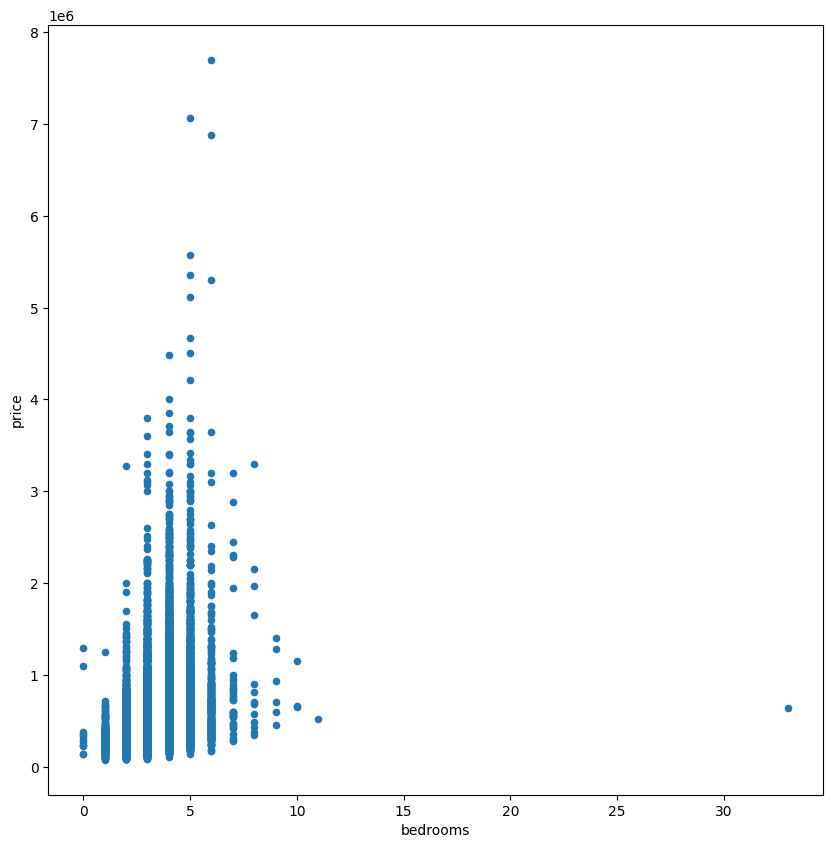

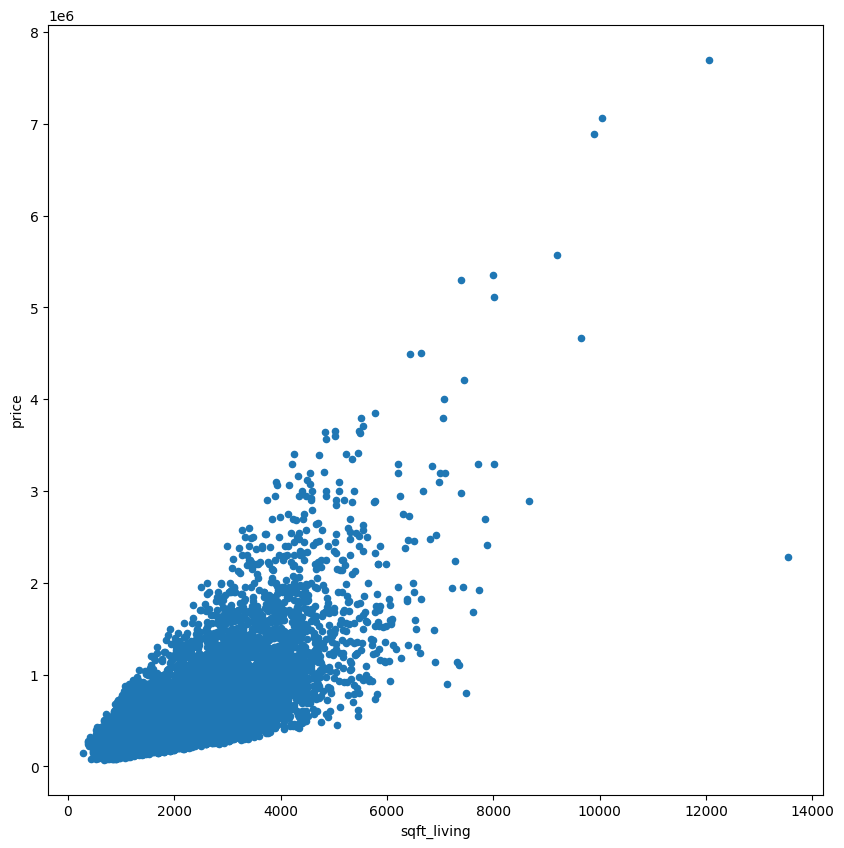

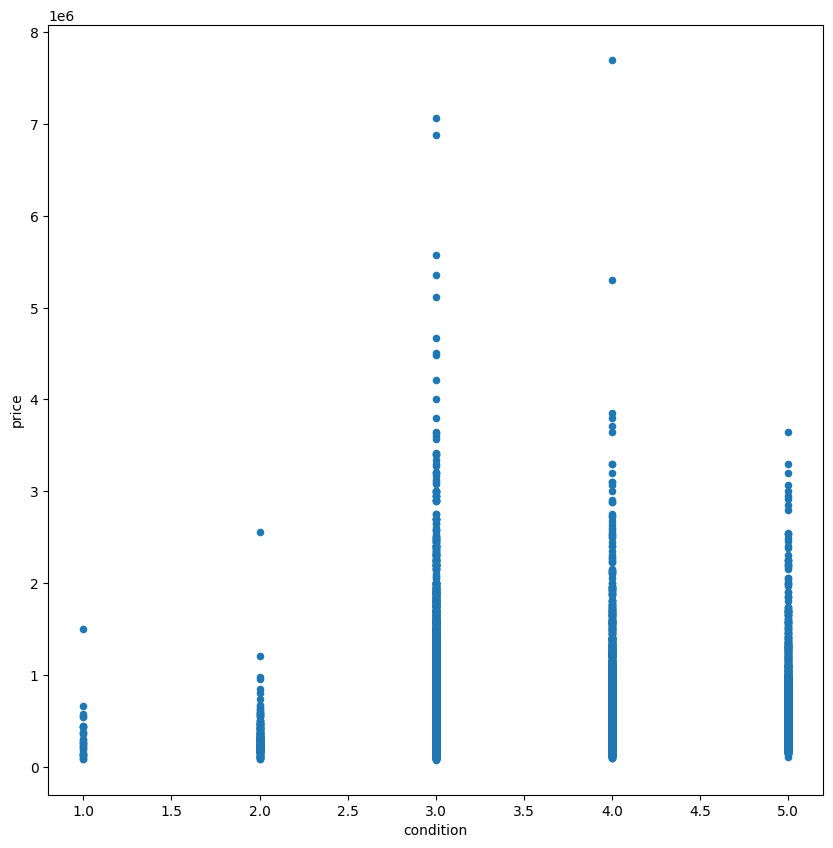

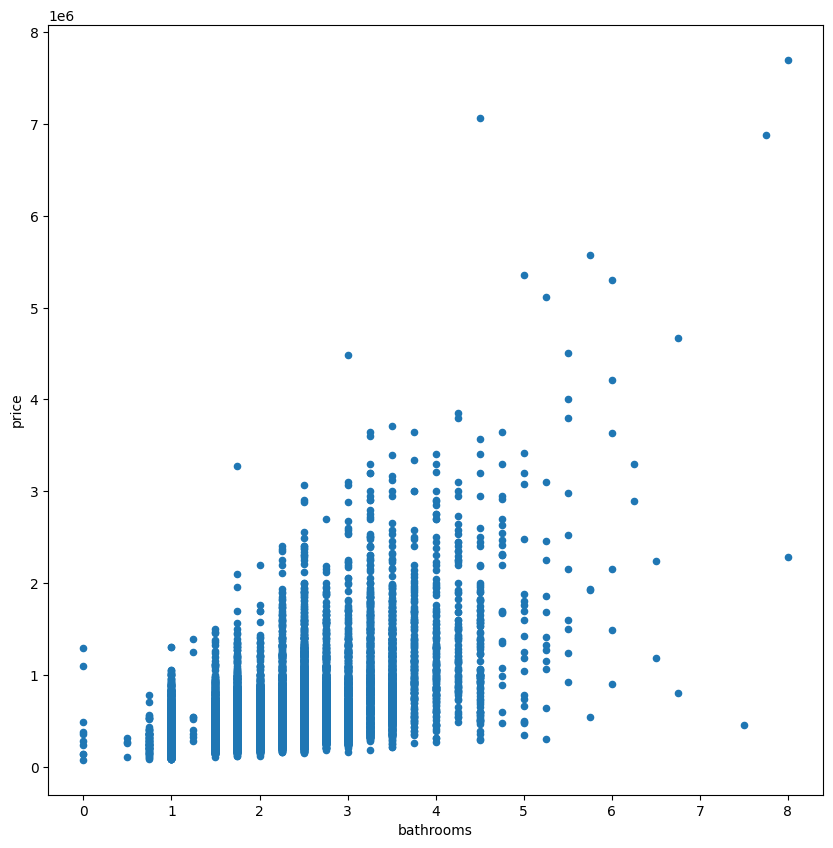

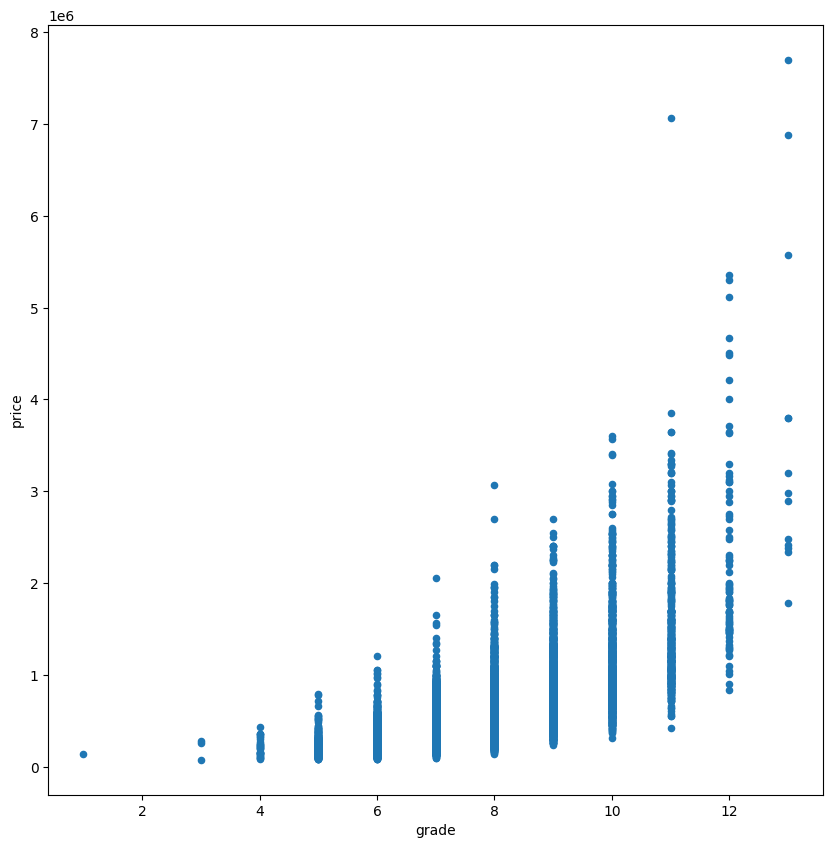

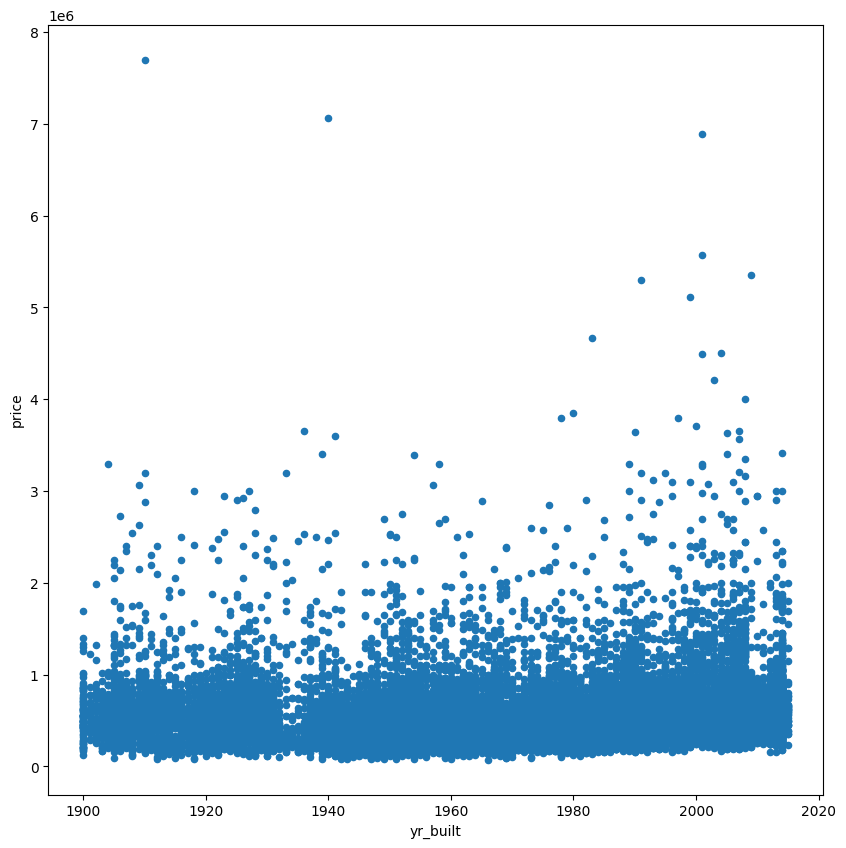

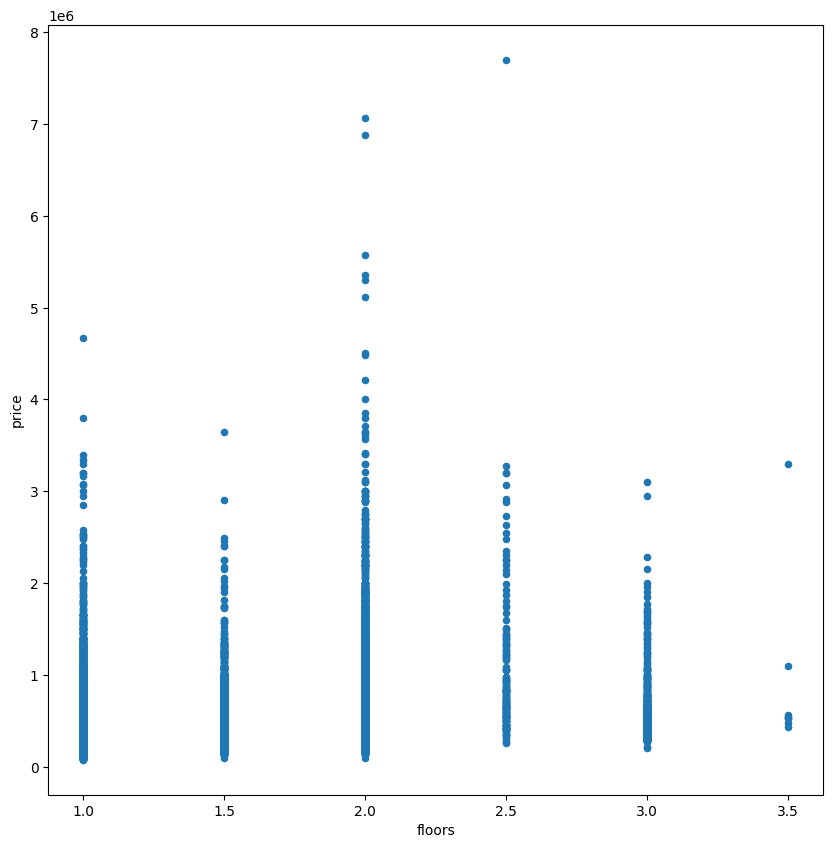

In [240]:
dados.plot(x='bedrooms', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='sqft_living', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='condition', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='bathrooms', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='grade', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='yr_built', y='price',
        kind="scatter", figsize=(10, 10))

dados.plot(x='floors', y='price',
        kind="scatter", figsize=(10, 10))


plt.show()


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [242]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [243]:
previsoes = model.predict(X_test)
previsoes

array([ 732986.5178059 ,  316481.47739081,  922713.89898739, ...,
        377954.56374   , 1440111.59143057,  881330.43960313])

In [244]:
rmse = np.sqrt(mean_squared_error(previsoes,y_test))
rmse

243988.91492842048

In [245]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': previsoes})
df_temp.head(20)

,Actual,Predicted
0,459000.0,732986.517806
1,445000.0,316481.477391
2,1057000.0,922713.898987
3,732350.0,683951.784338
4,235000.0,341138.711415
5,555000.0,611923.730158
6,365000.0,586655.377497
7,685000.0,830766.863469
8,525000.0,543688.560654
9,449950.0,627650.115664


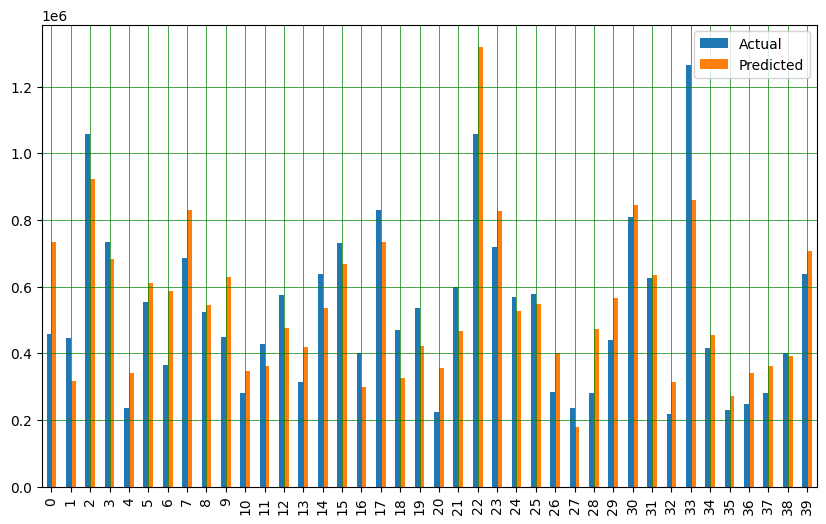

In [246]:
df_temp = df_temp.head(40)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [247]:
model.coef_

array([-43536.12215229,    176.26256429,  18211.88234107,  -3940.05015796,
        50155.60899583, 129540.08795656,  26579.30979203])

In [248]:
## Verificando a previsão em um ponto de dados

X_new = np.array([3,120,5,2020,2,8,12]).reshape(1,-1)
model.predict(X_new)

array([362160.65804493])

In [249]:
# Salvando modelo, isso irá gerar o arquivo .pkl


joblib.dump(model,"apartment_price_prediction.pkl")

['apartment_price_prediction.pkl']

---

---